# Memoria del proyecto

### Reinas del tablero 

#### Estudio de los factores que afectan en el ajedrez femenino a nivel internacional.

#### Introducción

Históricamente, el ajedrez ha sido dominado por hombres. La participación masculina en torneos, la presencia de maestros reconocidos y la representación en la élite del ajedrez supera considerablemente a la de las mujeres. Sin embargo, en los últimos años se está observando que la situación está cambiando y que el número de mujeres participantes está aumentando. 

Estas transformaciones requieren de una investigación para analizar las diferencias existentes y los factores a los que podría atribuirse estas diferencias entre géneros. 

El propósito de este proyecto es investigar posibles diferencias entre hombres y mujeres en el ámbito del ajedrez. Se busca determinar qué variables influyen de manera significativa en cada jugador o jugadora. Los resultados obtenidos servirán para concienciarnos sobre las diferencias de género presentes en el mundo del ajedrez.

Los datos utilizados en el proyecto se obtuvieron de la página web oficial de la Federación Internacional de Ajedrez (FIDE) en la dirección https://www.fide.com/. 

Los conjuntos de datos han sido acotados para abarcar el periodo comprendido entre enero de 2015 y diciembre de 2020.

### Análisis

#### Importación de librerías

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bootcampviztools import*
from scipy.stats import*
import squarify

import warnings
warnings.filterwarnings("ignore")

#### 1: Análisis de las variables de ajedrez en el año 2020

In [25]:
#Primer dataset. Es un dataset estático en 2020, solo contiene datos de los jugadores en el 2020.
df_2020_clean = pd.read_csv('datasets_clean/players_clean.csv')

Describimos a continuación todas las columnas de este nuevo dataset:

| Columna/Variable | Descripción | Tipo de variable |
| ---------------- | ----------- | ----------- |
| fide_id         | Número de identificación FIDE | Numérica discreta |
| name           | Nombre del jugador o jugadora | Categórica |
| federation              | País del jugador o jugadora | Categórica |
| gender              | Jugador de género masculino (M) o femenino (F) | Binaria |
| title            | Titulo | Categórica |
| continent            | Continente del jugador o jugadora |  Categórica |
| years_id_2020             | Edad del ajedrecista en el año 2020 | Numérica discreta |
| rating_standard_2020            | ELO estándar del año 2020 | Numérica discreta |
| category_age_2020            | Categoría de edad en el año 2020 |  Categórica |

#### Clasificación de variables

Dividimos las variables por tipo:

In [26]:
categoricas_df_2020 = ['continent','category_age_2020', 'title', 'gender']
numericas_df_2020 = ['rating_standard_2020','years_id_2020'] 

Se han incluído únicamente en estas listas aquellas variables que son viables analizar y que pueden aportar información de una manera sencilla. Los motivos por los que descartamos el resto de variables son:

df_2020:
- fide_id: no aporta información susceptible de análisis.
- name: no aporta información susceptible de análisis.
- federation: tiene 193 valores posibles lo cual puede complicar la visualización de las gráficas. Se emplea, en su lugar, la columna 'continent' que permite englobar y analizar más fácilmente los datos.

El dataframe df_evolution_clean contiene columnas similares al df_2020, pero nos servirá más adelante para hipótesis relacionadas con la evolución de las jugadoras en el tiempo.

### Categóricas

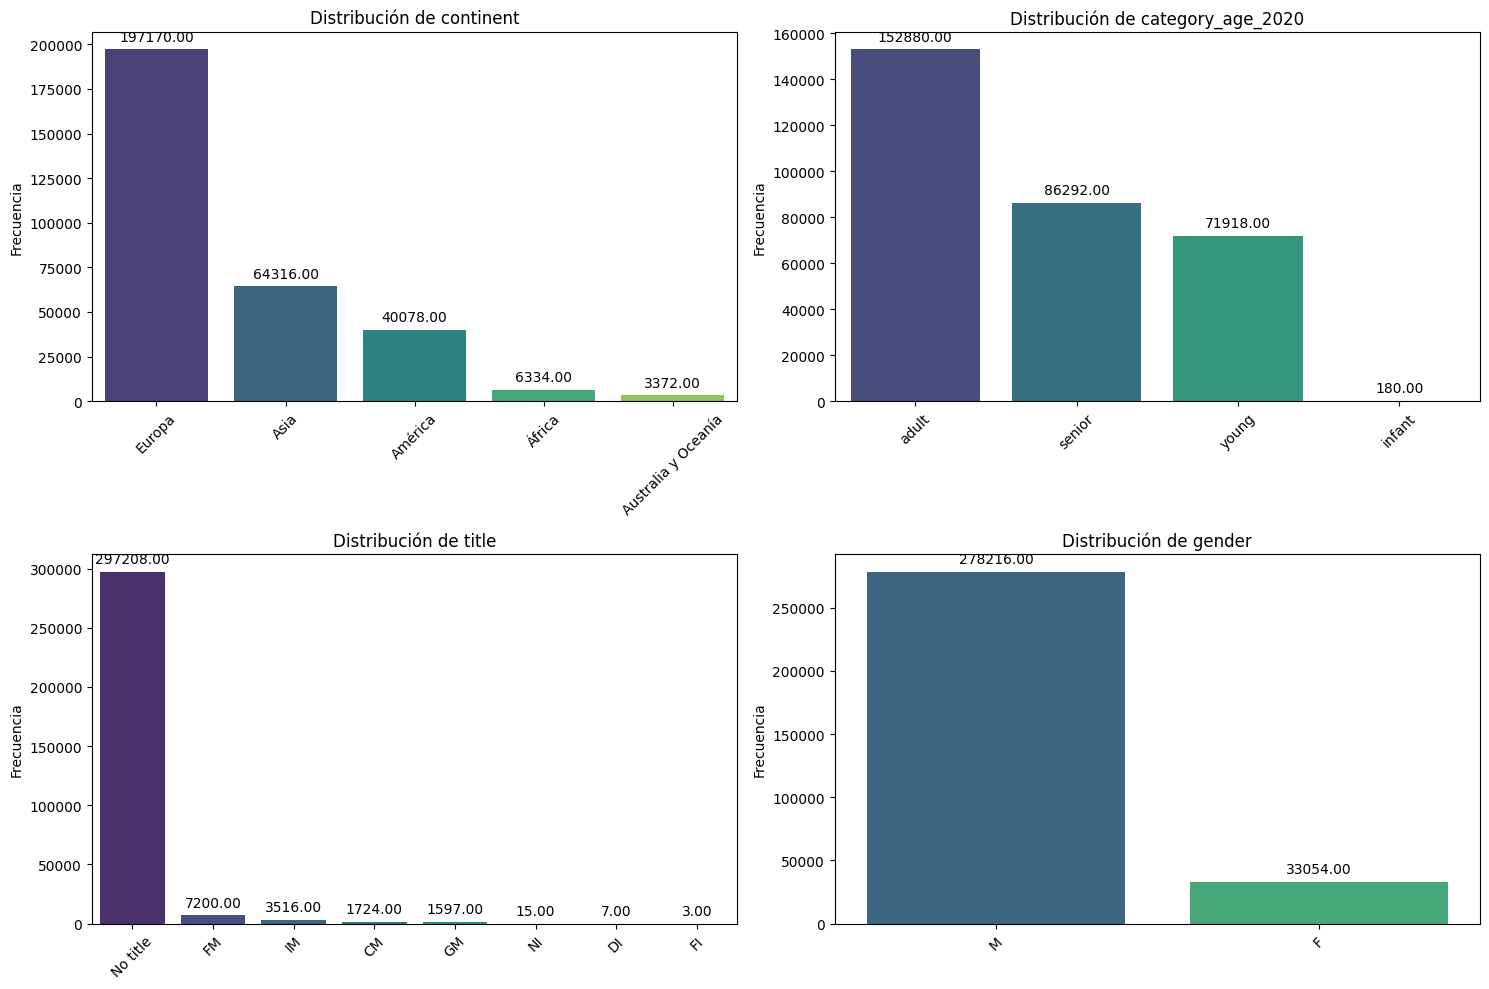

In [27]:
pinta_distribucion_categoricas(df_2020_clean, categoricas_df_2020, mostrar_valores= True)

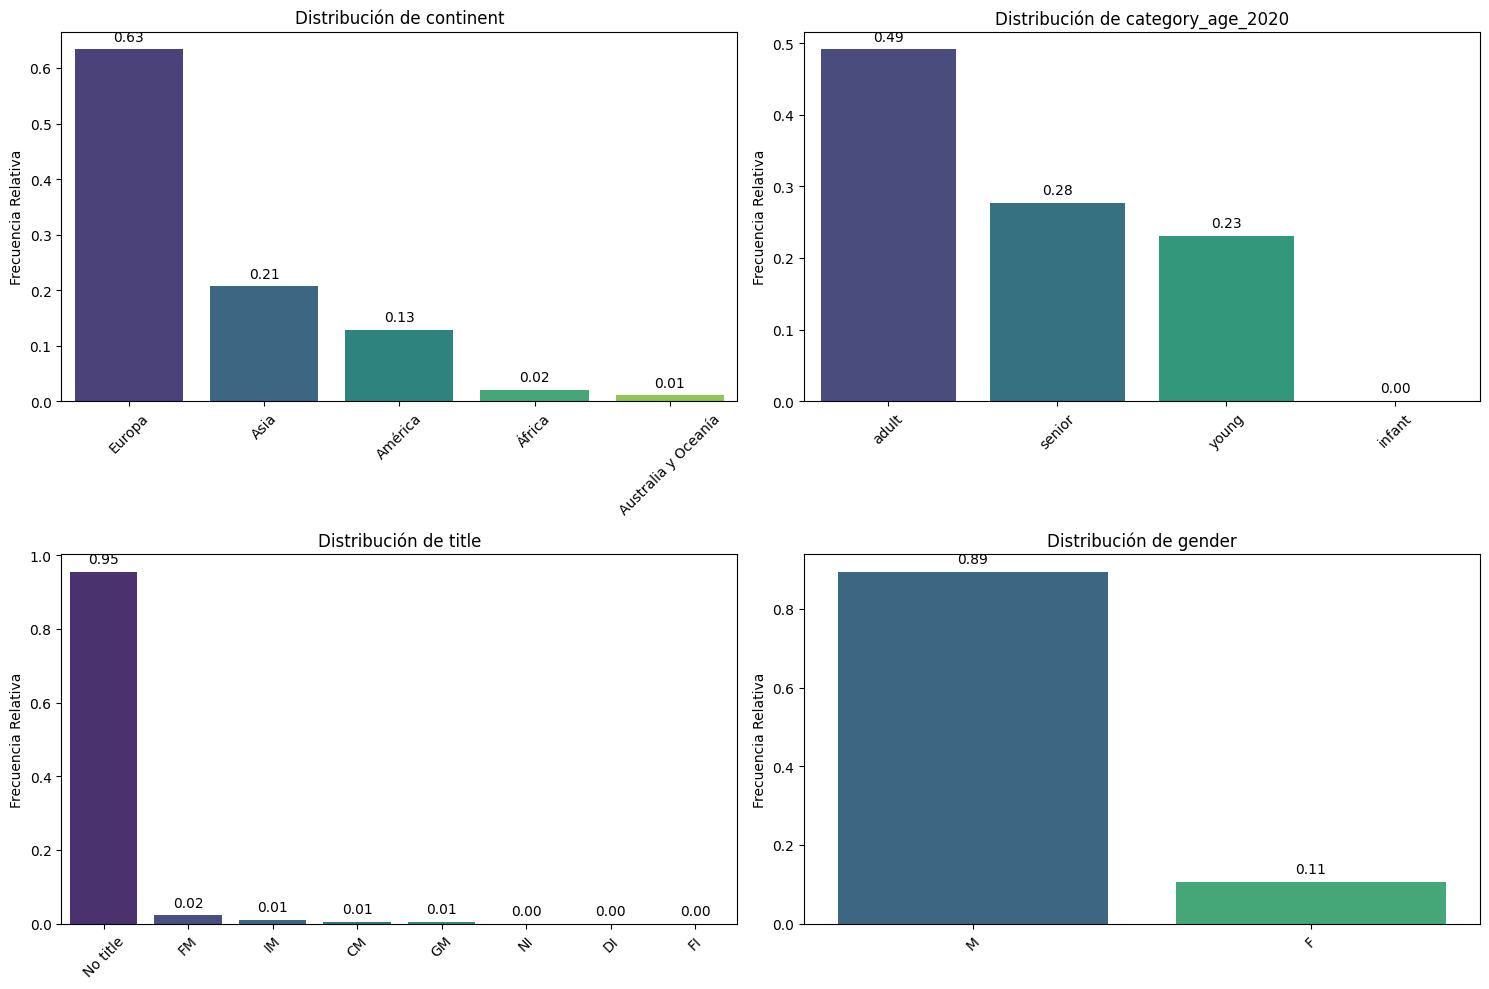

In [28]:
pinta_distribucion_categoricas(df_2020_clean, categoricas_df_2020 ,relativa= True, mostrar_valores= True)

Si analizamos cada variable:

***continent***:

Según estos valores el Europa se encuentra la mayoría de jugadores ajedrecistas (un 63%). Este dato es interesante ya que no es el esperado. Siempre se atribuyen los mejores jugadores a los estados de EEUU y Rusia, de modo que la sensación inicial es que la mayor parte de jugadores están allí. 

***category_age_2020***:


Esta variable muestra la distinción entre los jugadores por edades.
Dicha distinción se ha seguido según los criterios de campeonatos de ajedrez:
- De 0 a 8 años serán jugadores 'infant'
- De 9 a 18 años serán jugadores 'young'
- De 19 a 50 años serán jugadores 'adult'
- Superior a 50 años serán jugadores 'senior'

Vemos que la categoría adulta es muy superior en número de jugadores que en el resto de categorías, con un total de 152.880 jugadores (48% del total). También destacan los menores de 8 años, que son un total de 180. 

***title***:


La mayoría de jugadores no tienen un título (96%). Sin embargo, se observan muchos títulos reconocidos por la FIDE.

***gender***:


La diferencia entre jugadores hombres y mujeres es bastante notable, un 89% de jugadores son de género masculino. Este dato será muy interesante analizarlo más adelante.

### Numéricas

Empezamos con sus medidas de tendencia central y de posición.

In [29]:
df_2020_clean[numericas_df_2020].describe()

,rating_standard_2020,years_id_2020
count,311270.000000,311270.000000
mean,1640.977399,36.077197
std,337.527861,20.119475
min,1001.000000,5.000000
25%,1353.000000,18.000000
50%,1657.000000,32.000000
75%,1896.000000,52.000000
max,2862.000000,101.000000


(2, 2)


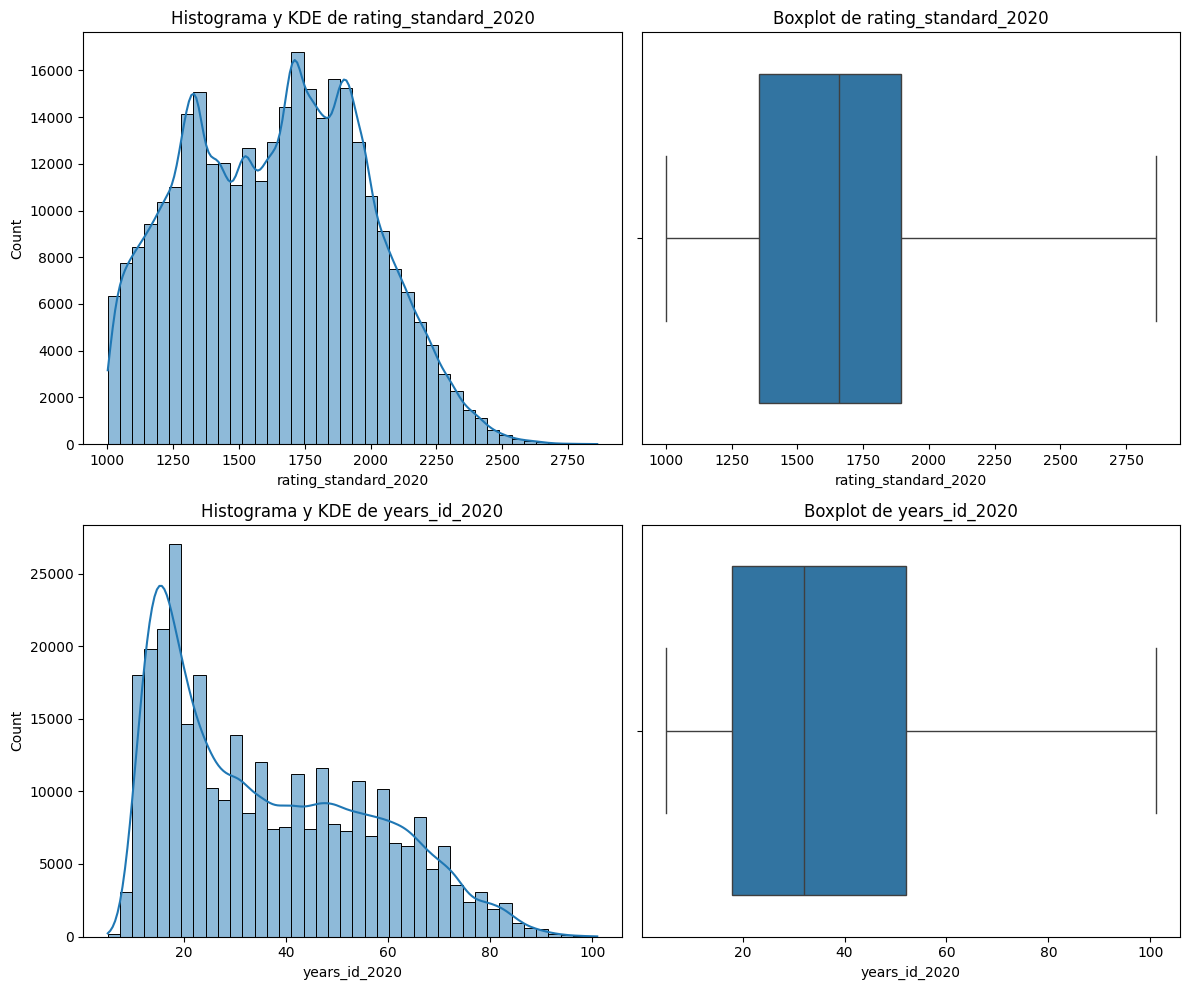

In [30]:
plot_combined_graphs(df_2020_clean, numericas_df_2020, whisker_width=2, bins = 40)

***rating_standard_2020***:

Observamos que el Elo estándar no presenta valores anómalos. La tendencia es tener entre 1250 y 2000 de Elo FIDE, aunque presenta picos en 1300, 1750 y 1900 aproximadamente. 

***years_id_2020***:

Observamos un pico entre los 18 y los 20 años, y vemos una curva que decrece a medida que la edad aumenta.


En primer lugar, analizaremos las variables categóricas y las posibles relaciones entre sí. De todos modos, pondremos especial atención en la variable gender, ya que es la que nos determina las relaciones existentes con el género.

A. ¿Existe una relación entre países y género?

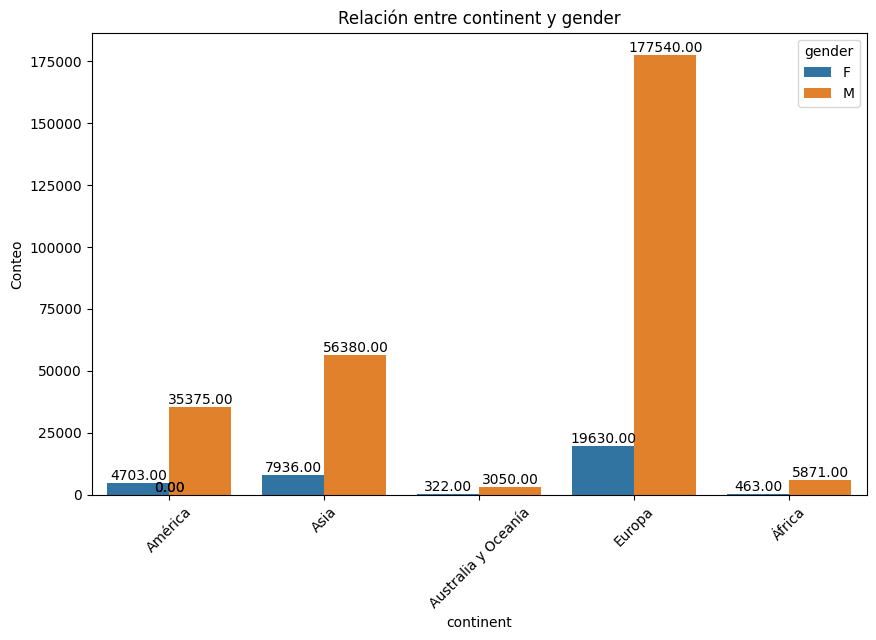

In [31]:
plot_categorical_relationship_fin(df_2020_clean, "continent","gender", show_values= True)

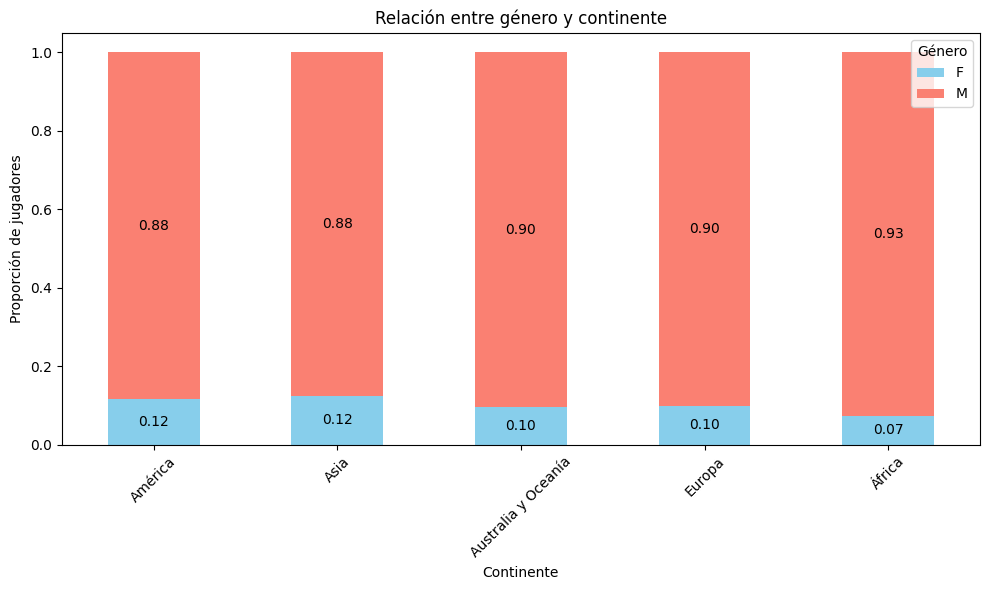

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Contar el número de jugadores por género y continente
grouped = df_2020_clean.groupby(['continent', 'gender']).size().unstack()

# Calcular valores relativos
grouped_relative = grouped.div(grouped.sum(axis=1), axis=0)

# Colores para cada género
colors = {'M': 'skyblue', 'F': 'salmon'}

# Graficar
ax = grouped_relative.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors.values())
plt.title('Relación entre género y continente')
plt.xlabel('Continente')
plt.ylabel('Proporción de jugadores')
plt.xticks(rotation=45)
plt.legend(title='Género')

# Añadir valores en el gráfico
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}', (x + width/2, y + height/2), ha='center', va='center', color='black')

plt.tight_layout()
plt.show()


En términos absolutos, vemos que la cantidad de jugadores europeos supera al resto de continentes. Ahora bien, en términos relativos se observa que los porcentajes en todos los continentes son muy parecidos, con un 10% de mujeres frente a un 90% de hombres. 

Para comparar la relación entre continente y género empleamos el test chi2

In [33]:
tabla_contingencia = pd.crosstab(df_2020_clean["continent"],df_2020_clean["gender"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 421.5338934524243
P-Value: 6.179256800051797e-90
Grados de Libertad: 4
Tabla de Frecuencias Esperadas:
 [[  4255.91355415  35822.08644585]
 [  6829.76536126  57486.23463874]
 [   358.07526585   3013.92473415]
 [ 20937.63350146 176232.36649854]
 [   672.61231728   5661.38768272]]


El valor p es extremadamente bajo. Esto significa que podemos rechazar la hipótesis nula de no dependencia y vemos que sí que hay una relación entre continente y género.

Tenemos el dato por continente, pero por curiosidad, representemos los primeros 20 países con más mujeres en el mundo.

In [34]:
df_2020_F = df_2020_clean[df_2020_clean.gender == 'F']
df_F = df_2020_F.groupby('federation').size().reset_index(name='sum')
df_F = df_F.sort_values(by = 'sum', ascending = False)
df_F = df_F.iloc[:20]
df_F

,federation,sum
74,RUS,7311
37,IND,3754
30,FRA,2331
71,POL,1943
26,ESP,1515
94,UKR,1038
92,TUR,969
12,BRA,875
42,ITA,786
73,ROU,748


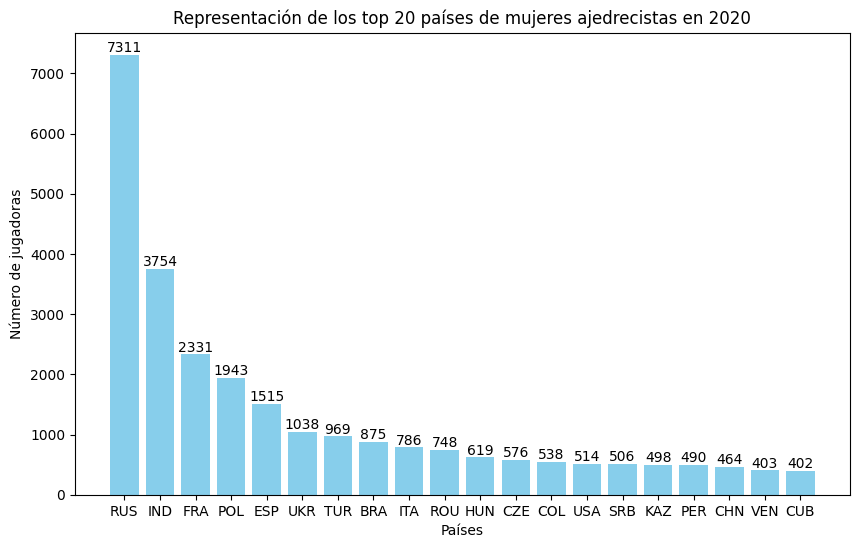

In [35]:
# Extraer los datos de los países y el sumatorio
paises = df_F['federation']
sumatorio = df_F['sum']

# Crear el diagrama de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(paises, sumatorio, color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Países')
plt.ylabel('Número de jugadoras')
plt.title('Representación de los top 20 países de mujeres ajedrecistas en 2020')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, '%d' % int(height), ha='center', va='bottom')

# Mostrar el diagrama de barras
plt.show()

B. ¿Habría alguna relación entre el titulo y el género?

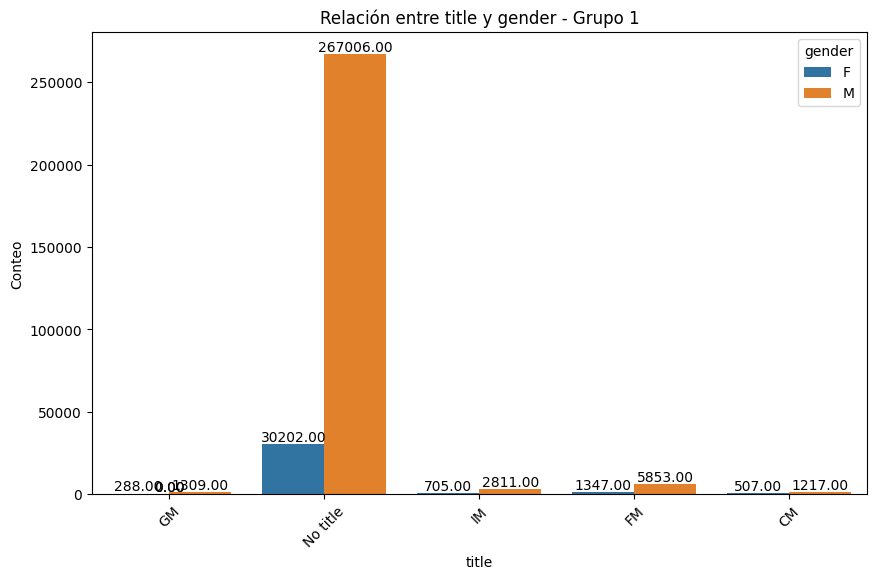

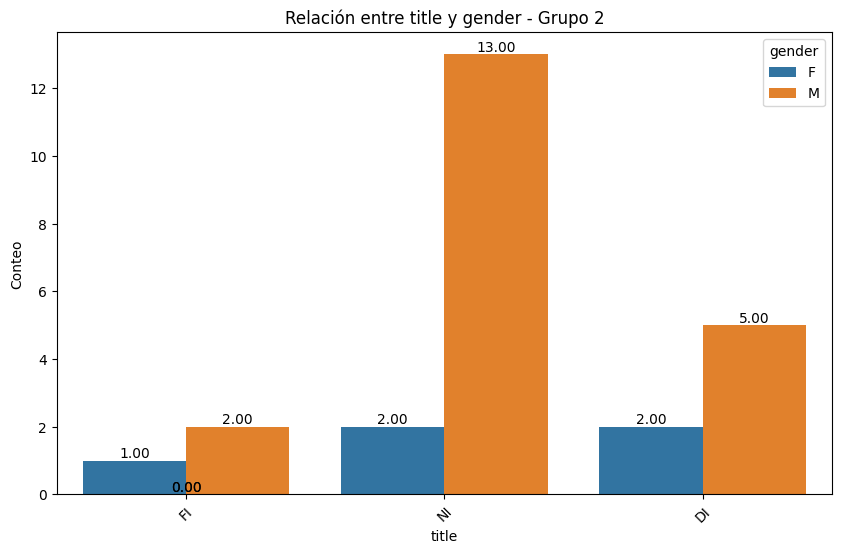

In [36]:
plot_categorical_relationship_fin(df_2020_clean, "title","gender", show_values= True)

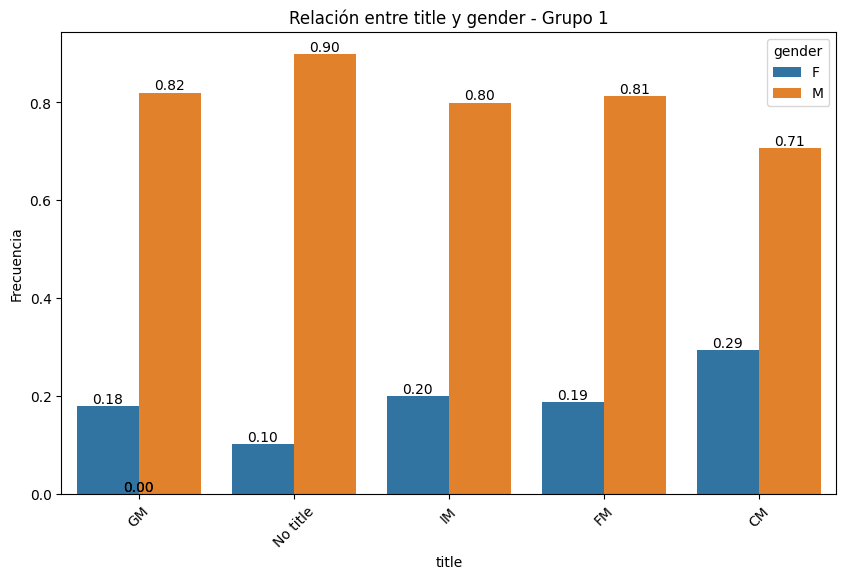

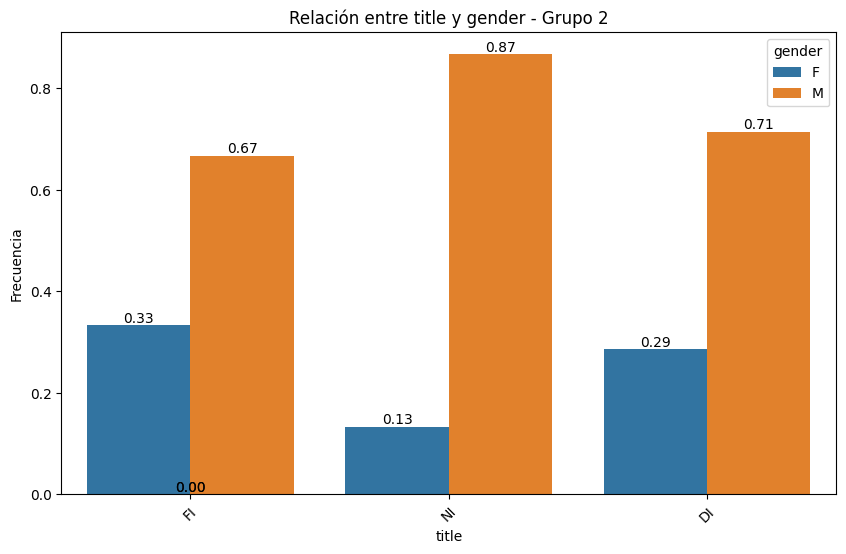

In [37]:
plot_categorical_relationship_fin(df_2020_clean, "title","gender", relative_freq= True, show_values= True)

Realicemos una gráfica mucho más visible. 
Agrupemos No title y title, como dos categorías.

In [38]:
df_2020_titles = df_2020_clean.copy()

categorias_a_renombrar = {'FM': 'Title',
                          'IM': 'Title',
                          'GM': 'Title',
                          'CM': 'Title',
                          'NI': 'Title',
                          'DI': 'Title',
                          'FI': 'Title',
                         }

df_2020_titles['title'] = df_2020_titles['title'].replace(categorias_a_renombrar)
df_2020_titles.title.value_counts()

title
No title    297208
Title        14062
Name: count, dtype: int64

In [39]:
categoria_frecuencia = df_2020_titles.copy()
categoria_frecuencia = categoria_frecuencia['title'].value_counts()
df_categoria_frecuencia = categoria_frecuencia.reset_index()
df_categoria_frecuencia.columns = ['title', 'frequency']
df_categoria_frecuencia

,title,frequency
0,No title,297208
1,Title,14062


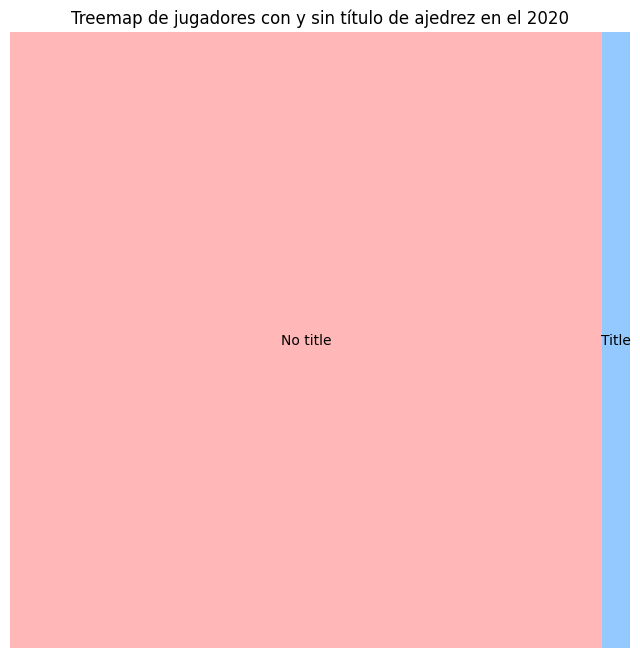

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify

# Colores para cada categoría
colors = ['#ff9999', '#66b3ff']

# Crear un treemap
plt.figure(figsize=(8, 8))
squarify.plot(sizes=df_categoria_frecuencia['frequency'], label=df_categoria_frecuencia['title'], alpha=0.7, color=colors)

# Añadir etiquetas y título
plt.axis('off')
plt.title('Treemap de jugadores con y sin título de ajedrez en el 2020')

# Mostrar el treemap
plt.show()

Y ahora, mostremos solo el treemap de titulados y los distintos titulados.

In [42]:
df_titulados = df_2020_clean.copy()
df_titulados = df_titulados[['title','gender']]
df_titulados = df_titulados[df_titulados.title != 'No title']
df_titulados

,title,gender
0,GM,M
1,GM,M
4,IM,M
5,IM,M
6,IM,M
...,...,...
307695,CM,F
307892,CM,M
307940,CM,M
308061,CM,M


In [43]:
grouped = df_titulados.groupby(['title', 'gender']).size().reset_index(name='sumatorio')


In [44]:
grouped

,title,gender,sumatorio
0,CM,F,507
1,CM,M,1217
2,DI,F,2
3,DI,M,5
4,FI,F,1
5,FI,M,2
6,FM,F,1347
7,FM,M,5853
8,GM,F,288
9,GM,M,1309


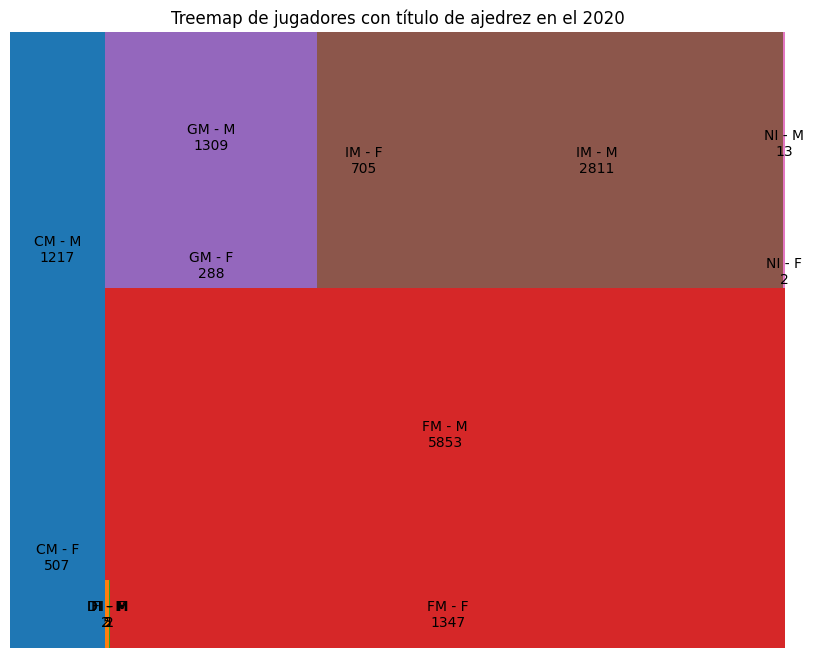

In [45]:
colors = {title: f'C{i}' for i, title in enumerate(grouped['title'].unique())}

plt.figure(figsize=(10, 8))
squarify.plot(sizes=grouped['sumatorio'], 
              label=[f'{t} - {g}\n{v}' for t, g, v in zip(grouped['title'], grouped['gender'], grouped['sumatorio'])],
              color=grouped['title'].map(colors))

plt.axis('off')
plt.title('Treemap de jugadores con título de ajedrez en el 2020')

plt.show()

In [47]:
# Filtramos solo los títulos GM, IM, FM
grouped_filtered = grouped[grouped['title'].isin(['GM', 'IM', 'FM'])]

# Agrupamos por género y calculamos el total y el porcentaje
grouped_final = grouped_filtered.groupby('gender').agg(
    total=('sumatorio', 'sum'),
    porcentaje=('sumatorio', lambda x: (x.sum() / grouped_filtered['sumatorio'].sum()) * 100)
).reset_index()

print(grouped_final)

  gender  total  porcentaje
0      F   2340   19.004304
1      M   9973   80.995696


In [49]:
# Filtramos solo los títulos GM, IM, FM
grouped_filtered = grouped[grouped['title'].isin(['GM', 'IM', 'FM'])]

# Agrupamos por título y género y calculamos el total y el porcentaje
grouped_final = grouped_filtered.groupby(['title', 'gender']).agg(
    total=('sumatorio', 'sum'),
    porcentaje=('sumatorio', lambda x: (x.sum() / grouped_filtered['sumatorio'].sum()) * 100)
).reset_index()

grouped_final

,title,gender,total,porcentaje
0,FM,F,1347,10.939657
1,FM,M,5853,47.535125
2,GM,F,288,2.338991
3,GM,M,1309,10.631040
4,IM,F,705,5.725656
5,IM,M,2811,22.829530


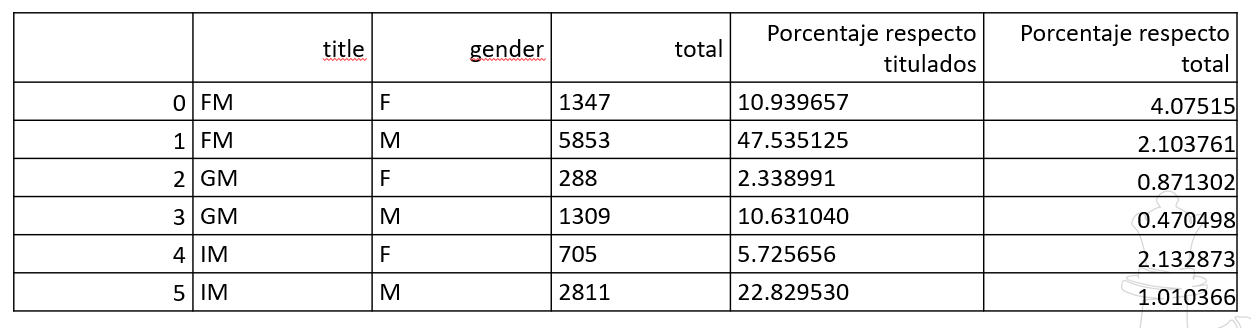

Respecto el total, el % de cada título es menor en mujeres que en hombres.

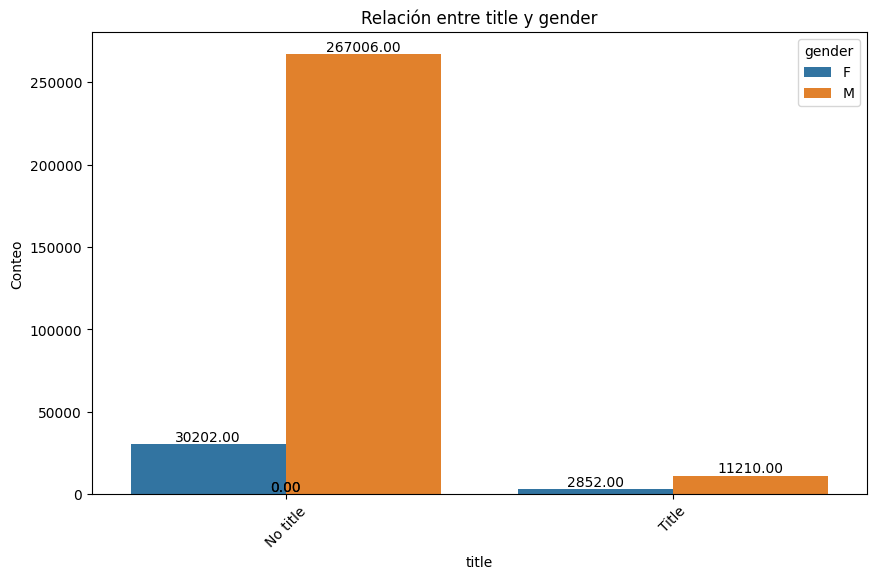

In [143]:
plot_categorical_relationship_fin(df_2020_titles, "title","gender", show_values= True)

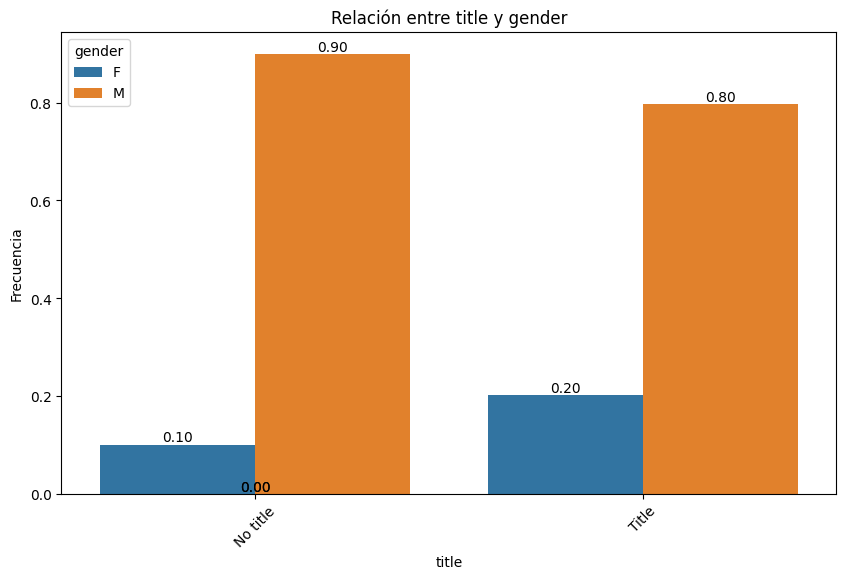

In [78]:
plot_categorical_relationship_fin(df_2020_titles, "title","gender", relative_freq= True, show_values= True)

Aparece un dato interesante, y es que con respecto el total de titulados, el porcentaje de mujeres es mayor con un título.

In [144]:
# Comparamos la relación entre categoría de título y género

tabla_contingencia = pd.crosstab(df_2020_titles["gender"],df_2020_titles["title"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 1447.620058586565
P-Value: 0.0
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[ 31560.74543644   1493.25456356]
 [265647.25456356  12568.74543644]]


Dado que el valor p es muy cercano a cero (0.0), hay evidencia significativa para rechazar la hipótesis nula de independencia entre las dos variables categóricas. Esto significa que hay una asociación significativa entre las dos variables en estudio. La fuerza de esta asociación se refleja en el alto valor del estadístico chi-cuadrado.

A continuación nos enfocamos en los jugadores y jugadoras titulados. 

In [148]:
df_with_title = df_2020_clean.copy()
df_with_title = df_with_title.drop(df_with_title.loc[df_with_title.title == 'No title'].index)
df_with_title.title.value_counts()

title
FM    7200
IM    3516
CM    1724
GM    1597
NI      15
DI       7
FI       3
Name: count, dtype: int64

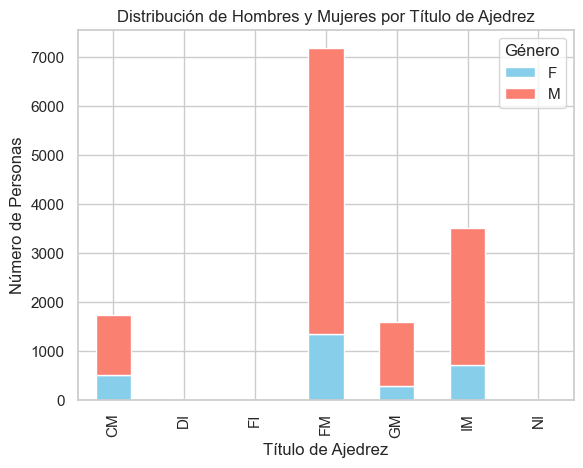

In [156]:
import matplotlib.pyplot as plt

# Agrupar el DataFrame por título de ajedrez y género, contar el número de personas en cada grupo y desapilar los resultados
grouped = df_with_title.groupby(['title', 'gender']).size().unstack()

# Crear un gráfico de barras apiladas
ax = grouped.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])

# Agregar etiquetas y título
plt.xlabel('Título de Ajedrez')
plt.ylabel('Número de Personas')
plt.title('Distribución de Hombres y Mujeres por Título de Ajedrez')

# Mostrar el gráfico
plt.legend(title='Género')
plt.show()


Con números, sería:

In [162]:
grouped = df_with_title.groupby(['gender', 'title']).size().unstack() # Agrupamos el DataFrame por género y título, y calculamos la suma de cada grupo
total_per_gender = grouped.sum(axis=1) # Calculamos el sumatorio total de cada género
percentage_per_gender = grouped.div(total_per_gender, axis=0) * 100 # Calculamos el porcentaje representativo de cada título para cada género


In [161]:
grouped

title,CM,DI,FI,FM,GM,IM,NI
gender,,,,,,,
F,507,2,1,1347,288,705,2
M,1217,5,2,5853,1309,2811,13


In [159]:
percentage_per_gender

title,CM,DI,FI,FM,GM,IM,NI
gender,,,,,,,
F,17.776999,0.070126,0.035063,47.230014,10.098177,24.719495,0.070126
M,10.856378,0.044603,0.017841,52.212310,11.677074,25.075825,0.115968


¿Y si nos enfocamos en las tres variables que hemos analizado hasta ahora, al mismo tiempo? Es decir, cómo sería una relación entre continente - título - género?

In [183]:
def tricategorical_analysis(df, directora, otras, relativa = False, muestra_valores = False):
    col_directora = directora
    col_1 = otras[0]
    col_2 = otras[1]
    diccionario_multivariante = {}
    for valor in df[col_directora].unique():
        diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]] 

    for valor,df_datos in diccionario_multivariante.items():
        print(f"Respuesta {valor}:")
        plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= relativa, show_values= muestra_valores)

Respuesta América:


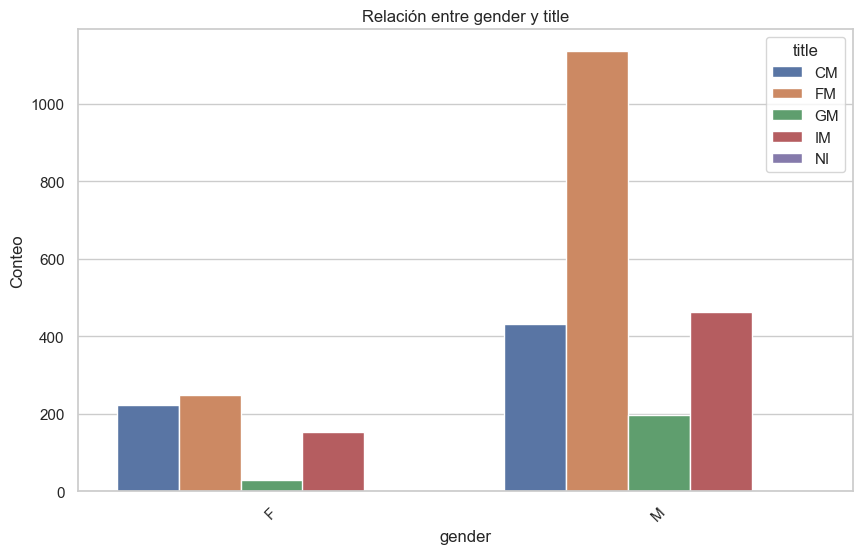

Respuesta Europa:


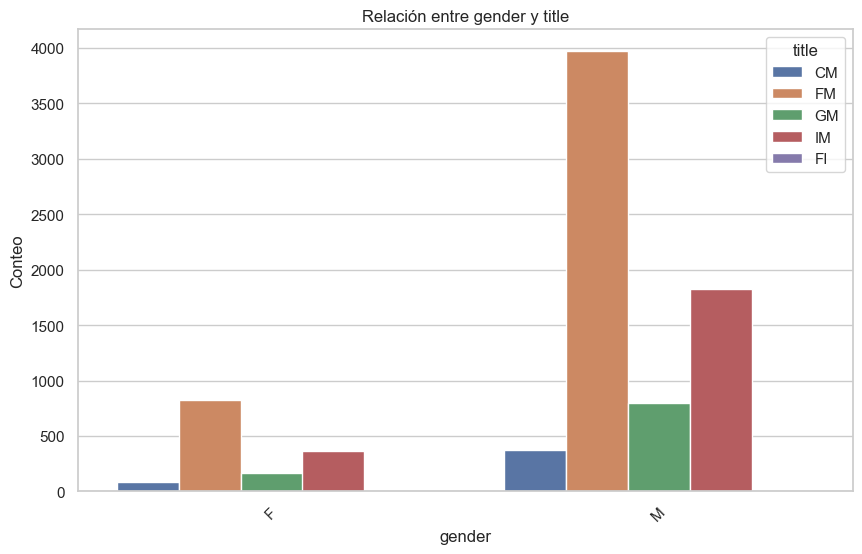

Respuesta Asia:


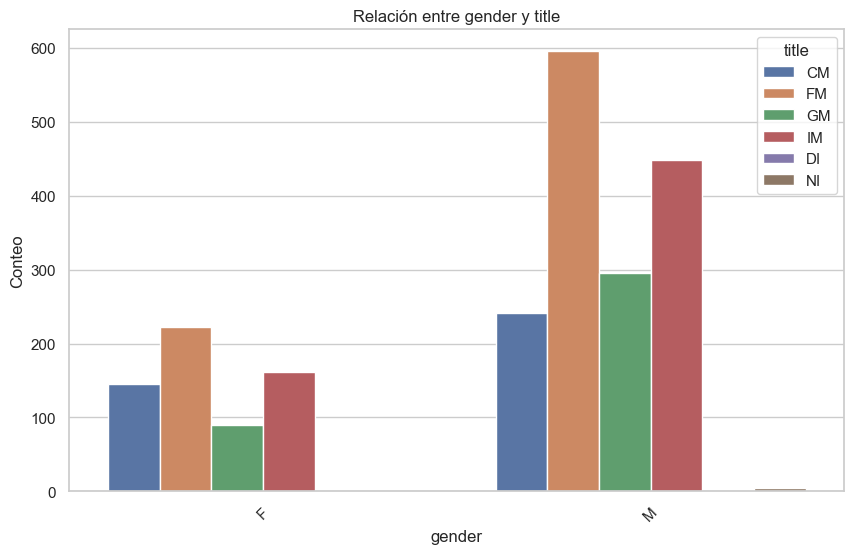

Respuesta Australia y Oceanía:


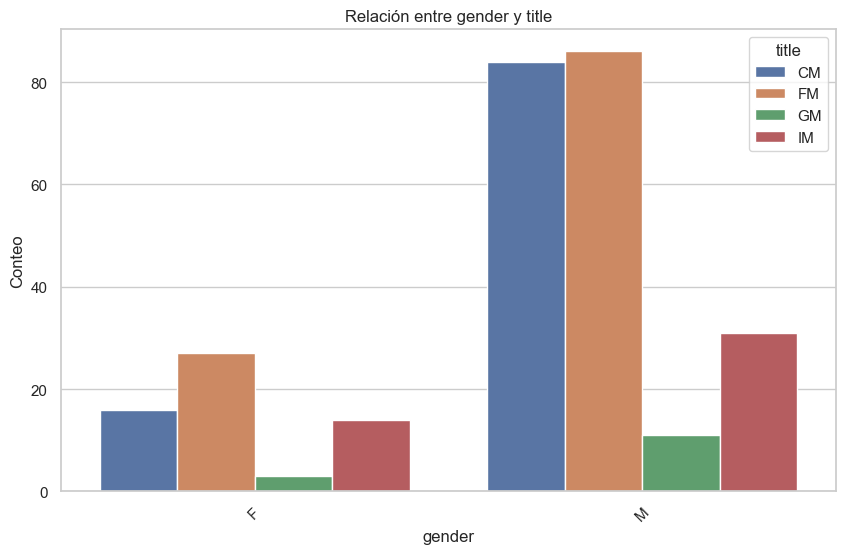

Respuesta África:


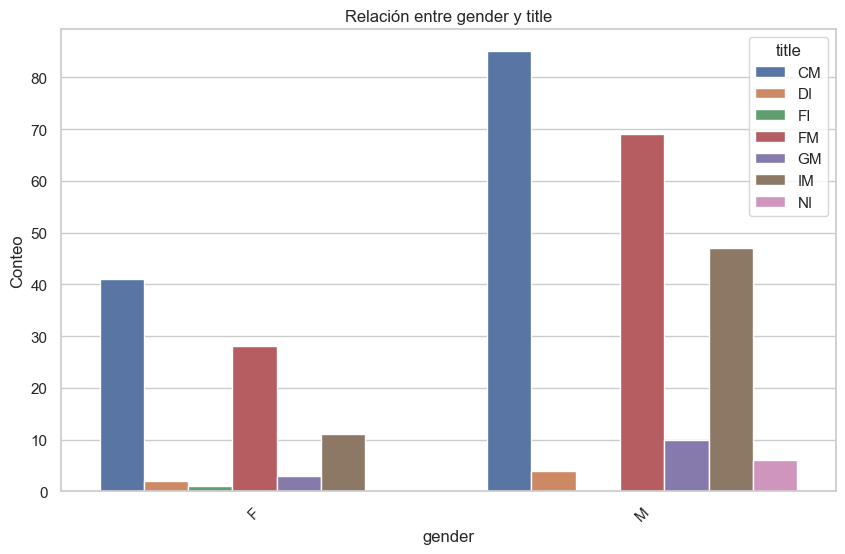

In [187]:
tricategorical_analysis(df_with_title, "continent", ["title","gender"])

C. ¿Qué relación hay entre género y Elo fide?

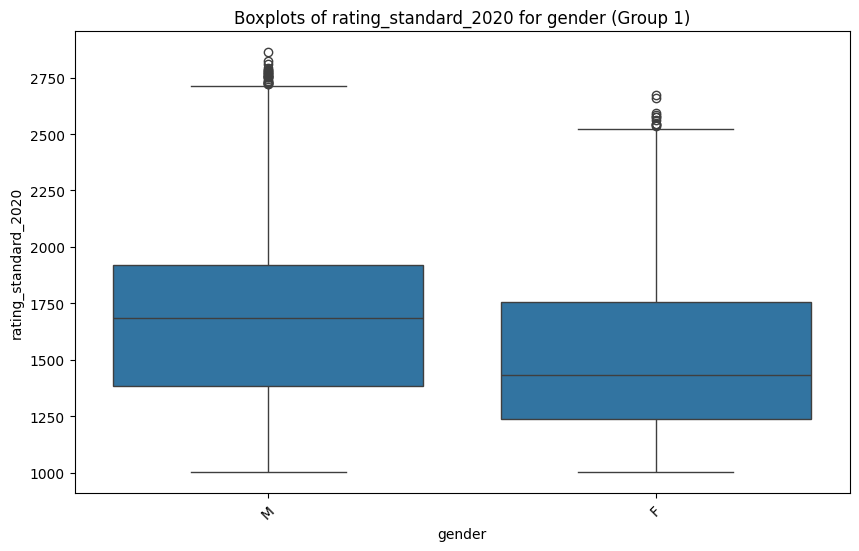

In [84]:
plot_grouped_boxplots(df_2020_clean,"gender","rating_standard_2020")

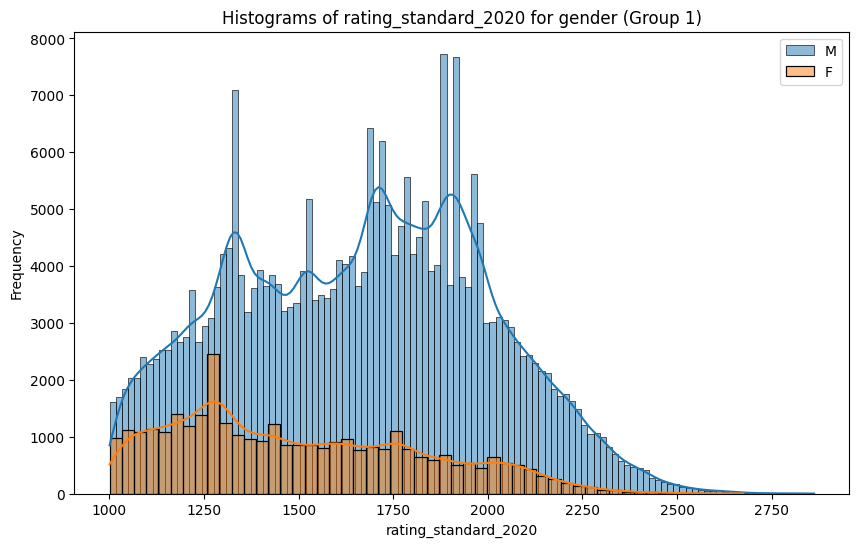

In [85]:
plot_grouped_histograms(df_2020_clean, "gender","rating_standard_2020", group_size = 2)

Hacemos la prueba U de Mann-Whitney

In [86]:
grupo_F = df_2020_clean.loc[df_2020_clean.gender == "F"]["rating_standard_2020"]
grupo_M = df_2020_clean.loc[df_2020_clean.gender == "M"]["rating_standard_2020"]


u_stat, p_valor = mannwhitneyu(grupo_F, grupo_M)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 3420732922.0
Valor p: 0.0


Con p-value inferior a 0.05, podemos concluir que ambas variables están relacionadas.

Seguimos investigando por las dos variables categóricas continente y género, y ahora le añadimos la variable Elo FIDE.

In [197]:
def trivariant_analysis(df, directora, cat2, num1, group_size = 3, bins = "auto"):
    col_directora = directora
    col_1 = cat2
    col_2 = num1
    diccionario_multivariante = {}
    for valor in df[col_directora].unique():
        diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]] 

    for valor,df_datos in diccionario_multivariante.items():
        print(f"Respuesta {valor}:")
        plot_grouped_histograms(df_datos,col_1,col_2, group_size= group_size)

Respuesta América:


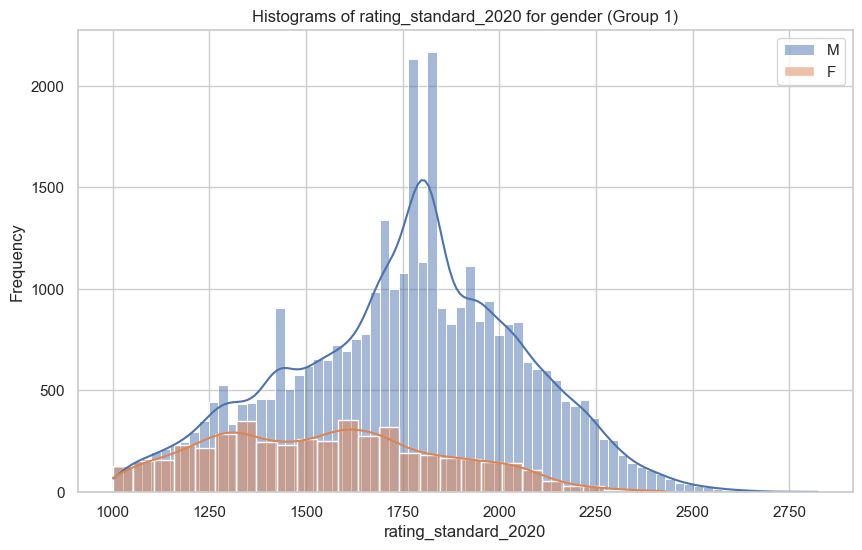

Respuesta Europa:


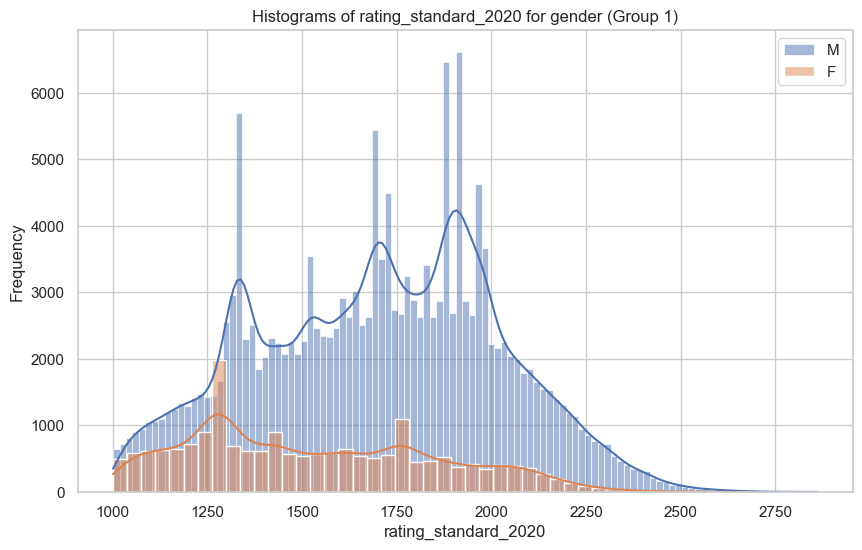

Respuesta Asia:


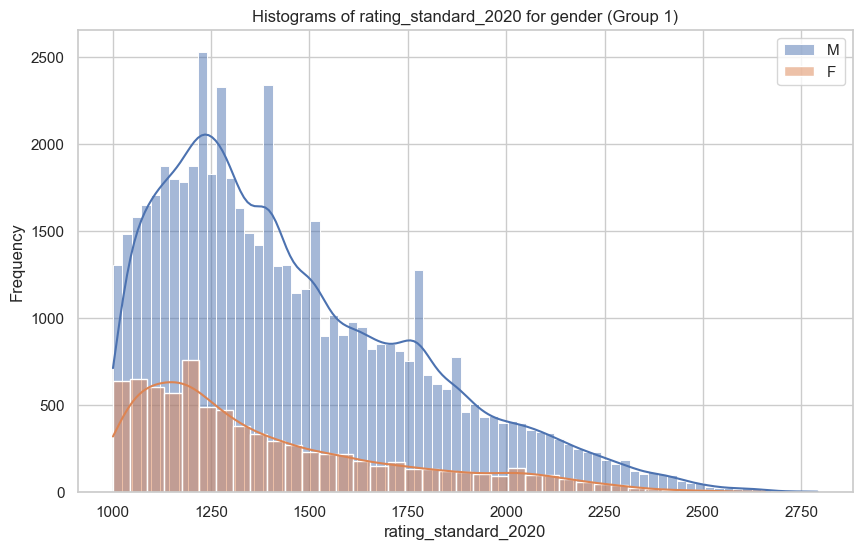

Respuesta Australia y Oceanía:


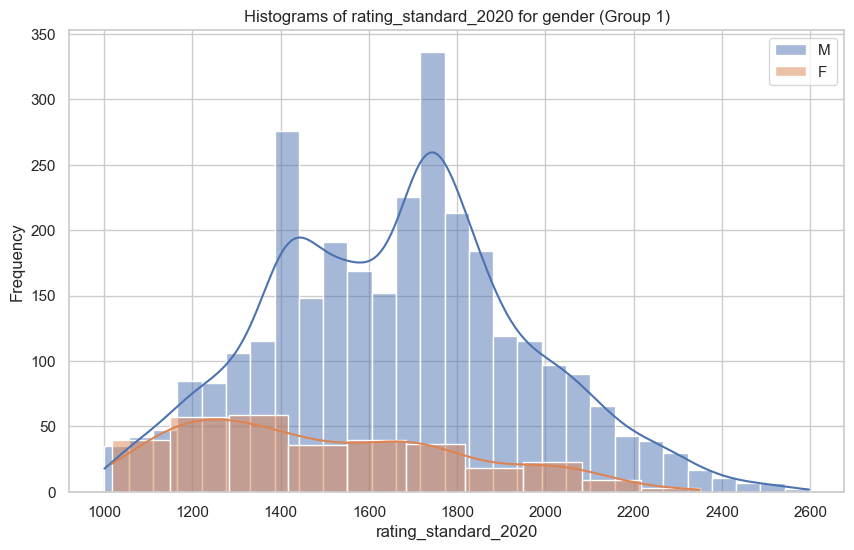

Respuesta África:


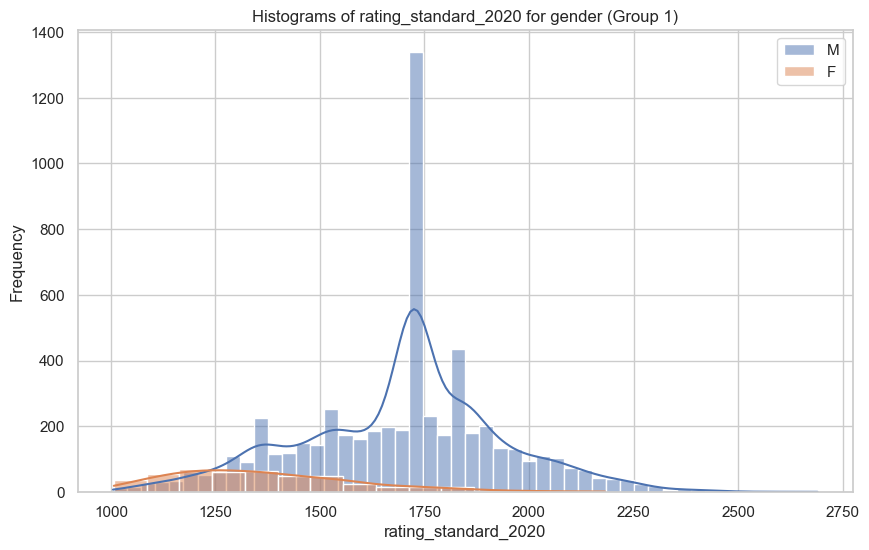

In [198]:
trivariant_analysis(df_2020_clean, "continent","gender","rating_standard_2020", 2, 30)

D. ¿Habría alguna relación entre Elo FIDE, el género y la edad?

In [191]:
col_directora = "gender"
col_1 = "rating_standard_2020"
col_2 = "years_id_2020"
diccionario_multivariante = {}
for valor in df_2020_clean[col_directora].unique():
    diccionario_multivariante[valor] = df_2020_clean.loc[df_2020_clean[col_directora] == valor,[col_2,col_1]]

Respuesta M:


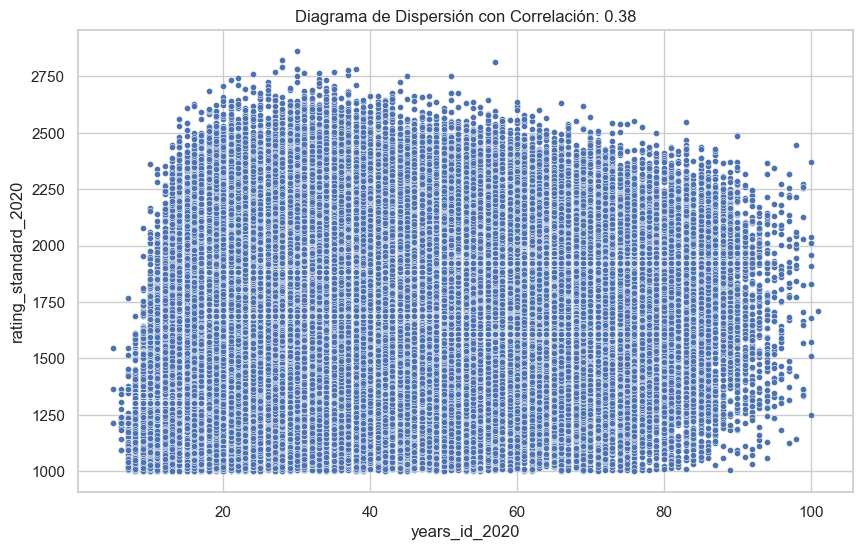

Respuesta F:


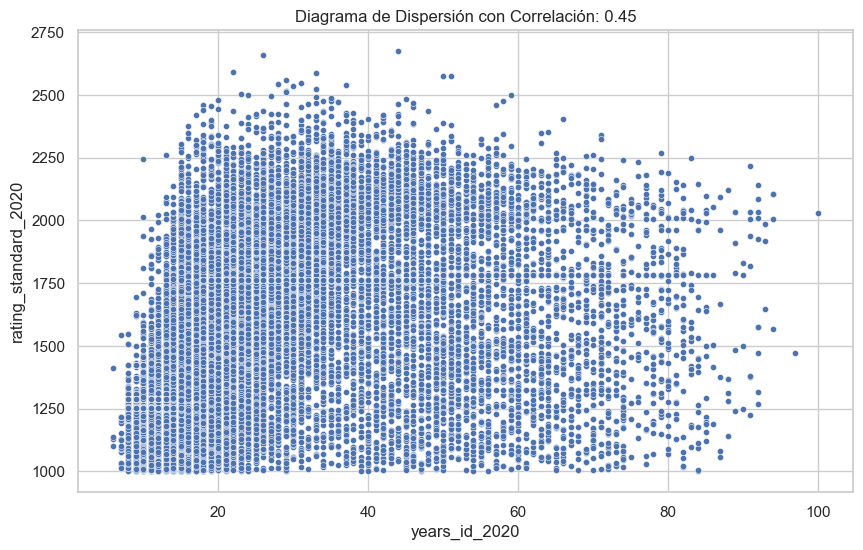

In [192]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

En estos gráficos se demuestra visualmente que no hay una correlación entre estas variables. De todos modos, veamos si con la variable categórica category_age_2020 se podría determinar alguna relación:

Respuesta senior:


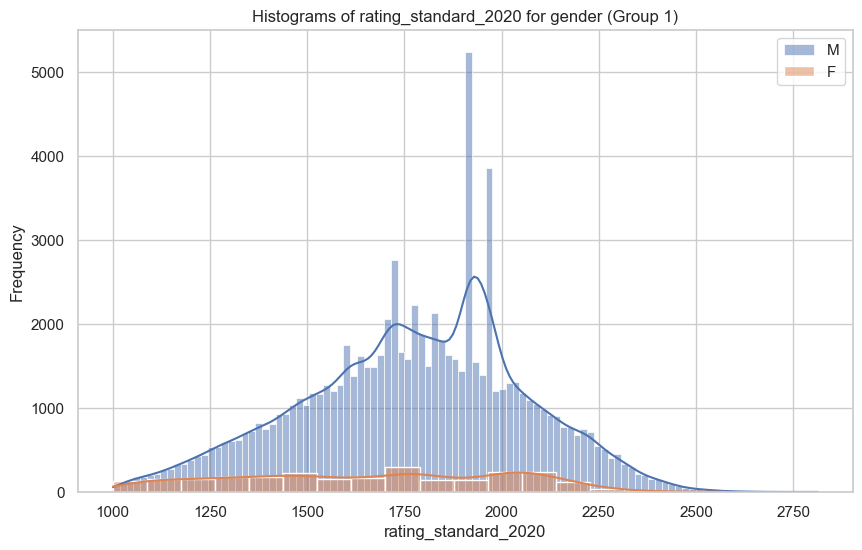

Respuesta adult:


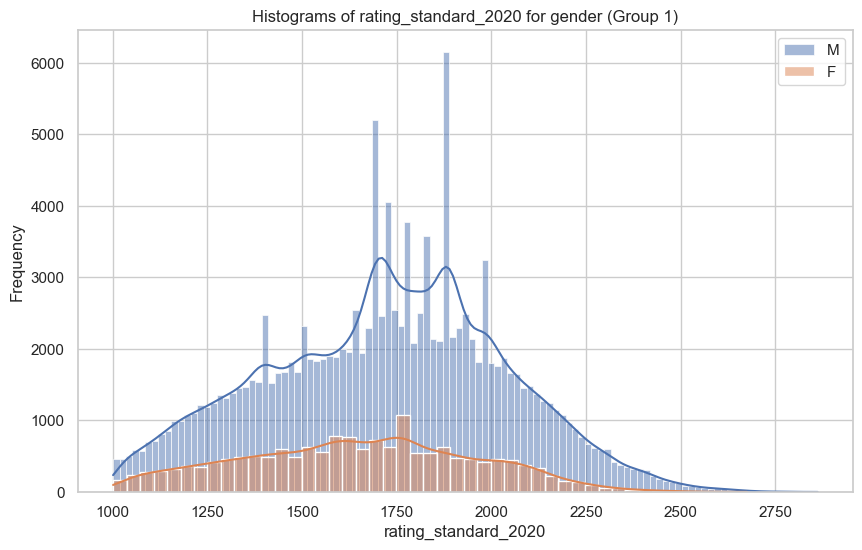

Respuesta young:


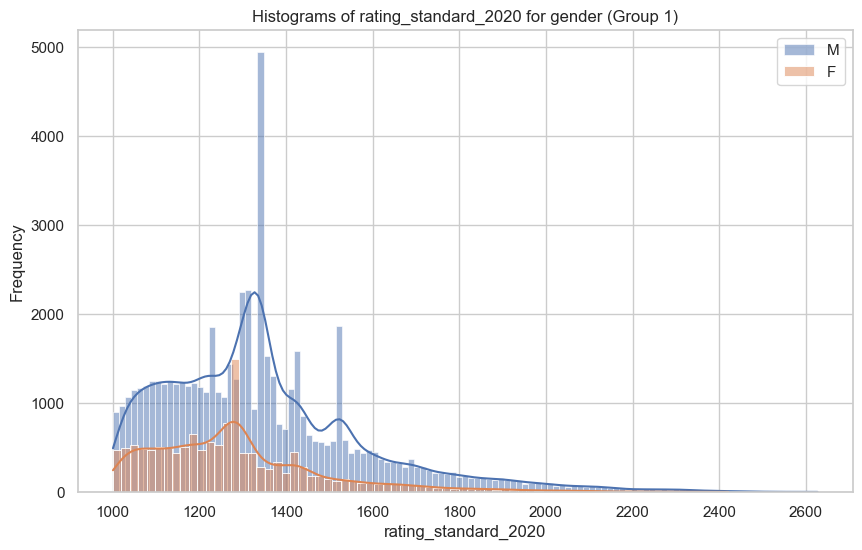

Respuesta infant:


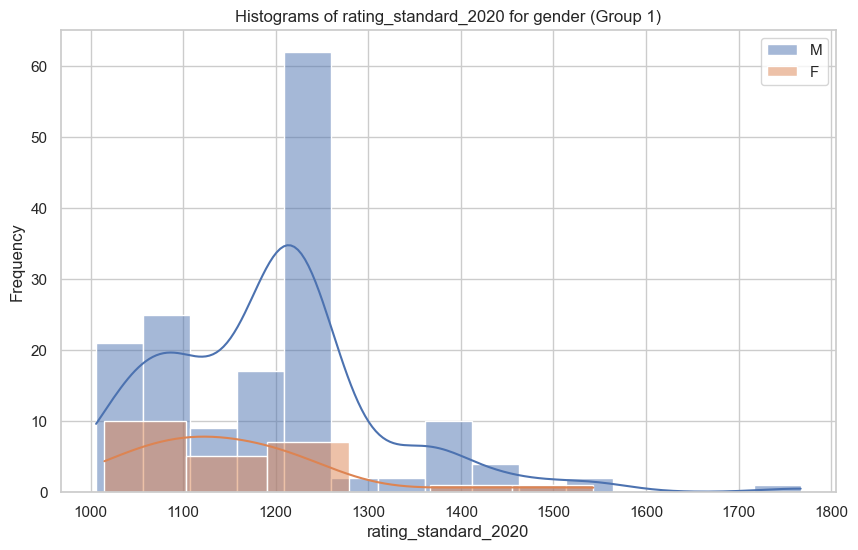

In [200]:
trivariant_analysis(df_2020_clean, "category_age_2020", "gender","rating_standard_2020", 2, 30)

#### 2: Evolución de los jugadores en el ajedrez desde enero 2015 hasta diciembre 2020


In [4]:
#Segundo dataset: Es un dataset que contiene los datos de evolución de Elo FIDE desde enero 2015 hasta diciembre 2020, donde se podrá trabajar con evoluciones
df_evolution_clean = pd.read_csv('datasets_clean/evolution_clean.csv')

Describimos a continuación todas las columnas de este nuevo dataset:

| Columna/Variable | Descripción | Tipo de variable |
| ---------------- | ----------- | ----------- |
| federation            | País del jugador o jugadora | Categórica |
| continent            | Continente del jugador o jugadora | Categórica |
| fide_id         | Número de identificación FIDE |  Numérica discreta |
| year          | Año | Numérica discreta |
| month              | Mes | Numérica discreta |
| rating_standard           | ELO estándar del año 2020 | Numérica discreta |
| name           | Nombre del jugador o jugadora | Categórica |
| gender              | Jugador de género masculino (M) o femenino (F) | Binaria |
| title            | Titulo | Categórica |
| years_id             | Edad del ajedrecista en el año indicado en la columna year | Numérica discreta |
| category_age            | Categoría de edad en el año indicado en la columna year| Categórica |

In [5]:
df_evolution_clean

,federation,continent,fide_id,year,month,rating_standard,gender,title,years_id,category_age
0,AFG,Asia,1025511,2015,1,1528,M,No title,53,senior
1,AFG,Asia,11700017,2015,1,1816,M,No title,82,senior
2,AFG,Asia,11700025,2015,1,2000,M,FM,50,senior
3,AFG,Asia,11700033,2015,1,1987,M,No title,27,adult
4,AFG,Asia,11700041,2015,1,1861,M,No title,53,senior
...,...,...,...,...,...,...,...,...,...,...
17100750,DJI,África,32500971,2020,12,1872,M,No title,35,adult
17100751,DJI,África,32500980,2020,12,1322,M,No title,30,adult
17100752,DJI,África,32501013,2020,12,1824,M,No title,26,adult
17100753,DJI,África,32501021,2020,12,1970,M,No title,26,adult


A. ¿Cuál es el género predominante en el ajedrez?

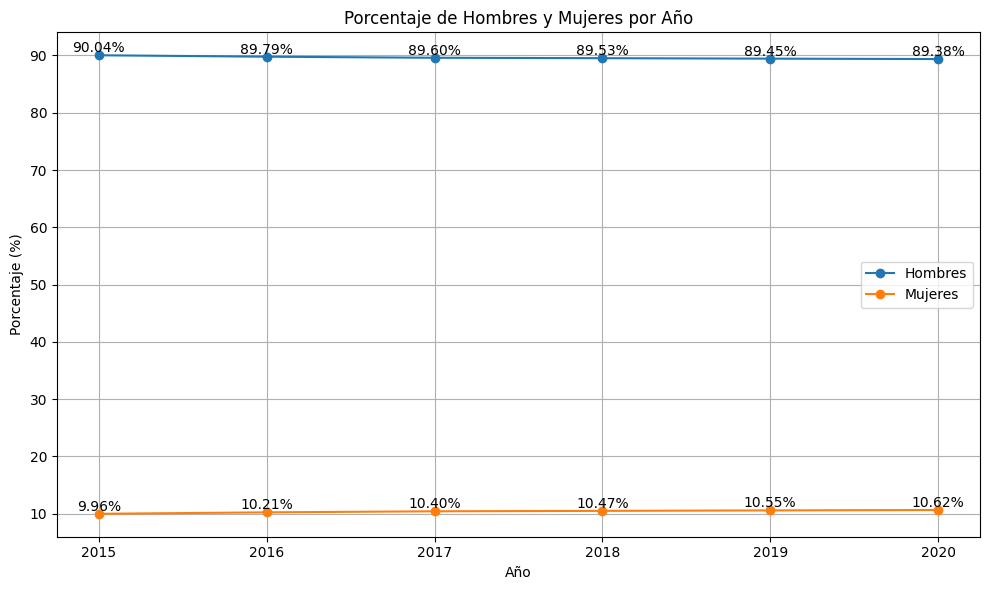

In [10]:
import matplotlib.pyplot as plt

# Agrupa los datos por año y género
grouped = df_evolution_clean.groupby(['year', 'gender'])

# Calcula el total de hombres y mujeres por año
gender_counts = grouped.size().unstack(fill_value=0)

# Calcula el total de jugadores por año
total_players = gender_counts.sum(axis=1)

# Calcula el porcentaje de hombres y mujeres por año
percentage_male = (gender_counts['M'] / total_players) * 100
percentage_female = (gender_counts['F'] / total_players) * 100

# Crea el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(percentage_male, marker='o', label='Hombres')
plt.plot(percentage_female, marker='o', label='Mujeres')

# Añade etiquetas de texto con el porcentaje en cada punto
for year, male, female in zip(total_players.index, percentage_male, percentage_female):
    plt.text(year, male, f'{male:.2f}%', ha='center', va='bottom')
    plt.text(year, female, f'{female:.2f}%', ha='center', va='bottom')

# Añade etiquetas y título
plt.xlabel('Año')
plt.ylabel('Porcentaje (%)')
plt.title('Porcentaje de Hombres y Mujeres por Año')
plt.legend()

# Muestra el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()



Conclusión: Los hombres son el género más predominante en el ajedrez, contamos con un casi 90% de participación masculina mientras que contamos con un 10% de participación femenina. Sabemos que los jugadores aumentan año tras año (se muestra en análisis posteriores), pero vemos que este porcentaje no varía.


A. ¿Cómo evoluciona el Elo FIDE por edad?

Debemos tener en cuenta que este dataset muestra tanto jugadores activos como jugadores inactivos. Los jugadores activos veremos que varía el Elo FIDE, pero los jugadores inactivos veremos que no varía a lo largo de los meses o años. Primero, haremos una distinción de éstos.

In [221]:
no_variacion = df_evolution_clean.groupby('fide_id')['rating_standard'].nunique() # Agrupamos por fide_id y contamos el número de valores únicos en rating_standard
fide_id_sin_variacion = no_variacion[no_variacion == 1].index # Filtramos los fide_id que tienen solo un valor único en rating_standard
jugadores_inactivos = df_evolution_clean[df_evolution_clean['fide_id'].isin(fide_id_sin_variacion)] # Filtramos el dataframe original para obtener las filas correspondientes a estos fide_id
jugadores_inactivos

,federation,continent,fide_id,year,month,rating_standard,gender,title,years_id,category_age
0,AFG,Asia,1025511,2015,1,1528,M,No title,53,senior
3,AFG,Asia,11700033,2015,1,1987,M,No title,27,adult
4,AFG,Asia,11700041,2015,1,1861,M,No title,53,senior
5,AFG,Asia,11700050,2015,1,1876,M,No title,51,senior
8,AFG,Asia,11700092,2015,1,1778,M,No title,46,adult
...,...,...,...,...,...,...,...,...,...,...
17100749,DJI,África,32500181,2020,12,1638,M,No title,40,adult
17100750,DJI,África,32500971,2020,12,1872,M,No title,35,adult
17100751,DJI,África,32500980,2020,12,1322,M,No title,30,adult
17100752,DJI,África,32501013,2020,12,1824,M,No title,26,adult


¿A qué edad dejan el ajedrez?

In [229]:
'''Vemos que la misma persona dejó el ajedrez desde el 2015 hasta el 2020, desde los 53 hasta los 58 años. De modo que dejó el ajedrez a les 53. Deberemos crear un programa para
que tenga en cuenta solamente el primer jugador que encuentre en la primera edad (el dataframe ya está ordenado por año y mes)'''
jugadores_inactivos[jugadores_inactivos.fide_id == 1025511] 

,federation,continent,fide_id,year,month,rating_standard,gender,title,years_id,category_age
0,AFG,Asia,1025511,2015,1,1528,M,No title,53,senior
27,AFG,Asia,1025511,2015,2,1528,M,No title,53,senior
56,AFG,Asia,1025511,2015,3,1528,M,No title,53,senior
85,AFG,Asia,1025511,2015,4,1528,M,No title,53,senior
116,AFG,Asia,1025511,2015,5,1528,M,No title,53,senior
...,...,...,...,...,...,...,...,...,...,...
3739,AFG,Asia,1025511,2020,8,1528,M,No title,58,senior
3822,AFG,Asia,1025511,2020,9,1528,M,No title,58,senior
3905,AFG,Asia,1025511,2020,10,1528,M,No title,58,senior
3988,AFG,Asia,1025511,2020,11,1528,M,No title,58,senior


In [227]:
def eliminar_duplicados_por_fide_id(df):
    # Crear un conjunto para mantener un registro de los fide_id incluidos
    fide_ids_incluidos = set()

    # Lista para almacenar las filas únicas
    filas_unicas = []

    # Iterar sobre cada fila del DataFrame original
    for index, fila in df.iterrows():
        fide_id = fila['fide_id']
        # Verificar si el fide_id ya ha sido incluido
        if fide_id not in fide_ids_incluidos:
            # Agregar la fila a la lista de filas únicas
            filas_unicas.append(fila)
            # Agregar el fide_id al conjunto de fide_ids incluidos
            fide_ids_incluidos.add(fide_id)

    # Crear un nuevo DataFrame con las filas únicas
    nuevo_df = pd.DataFrame(filas_unicas)

    return nuevo_df




In [228]:
jugadores_inactivos_primer_ano = eliminar_duplicados_por_fide_id(jugadores_inactivos)
jugadores_inactivos_primer_ano

,federation,continent,fide_id,year,month,rating_standard,gender,title,years_id,category_age
0,AFG,Asia,1025511,2015,1,1528,M,No title,53,senior
3,AFG,Asia,11700033,2015,1,1987,M,No title,27,adult
4,AFG,Asia,11700041,2015,1,1861,M,No title,53,senior
5,AFG,Asia,11700050,2015,1,1876,M,No title,51,senior
8,AFG,Asia,11700092,2015,1,1778,M,No title,46,adult
...,...,...,...,...,...,...,...,...,...,...
17100520,DJI,África,32500181,2018,11,1638,M,No title,38,adult
17100522,DJI,África,32501048,2018,11,1473,M,No title,35,adult
17100570,DJI,África,32500971,2019,6,1872,M,No title,34,adult
17100571,DJI,África,32500980,2019,6,1322,M,No title,29,adult


In [233]:
jugadores_inactivos_primer_ano[jugadores_inactivos_primer_ano.fide_id == 1025511]

,federation,continent,fide_id,year,month,rating_standard,gender,title,years_id,category_age
0,AFG,Asia,1025511,2015,1,1528,M,No title,53,senior


In [332]:
jugadores_inactivos_primer_ano

,federation,continent,fide_id,year,month,rating_standard,gender,title,years_id,category_age
0,AFG,Asia,1025511,2015,1,1528,M,No title,53,senior
3,AFG,Asia,11700033,2015,1,1987,M,No title,27,adult
4,AFG,Asia,11700041,2015,1,1861,M,No title,53,senior
5,AFG,Asia,11700050,2015,1,1876,M,No title,51,senior
8,AFG,Asia,11700092,2015,1,1778,M,No title,46,adult
...,...,...,...,...,...,...,...,...,...,...
17100520,DJI,África,32500181,2018,11,1638,M,No title,38,adult
17100522,DJI,África,32501048,2018,11,1473,M,No title,35,adult
17100570,DJI,África,32500971,2019,6,1872,M,No title,34,adult
17100571,DJI,África,32500980,2019,6,1322,M,No title,29,adult


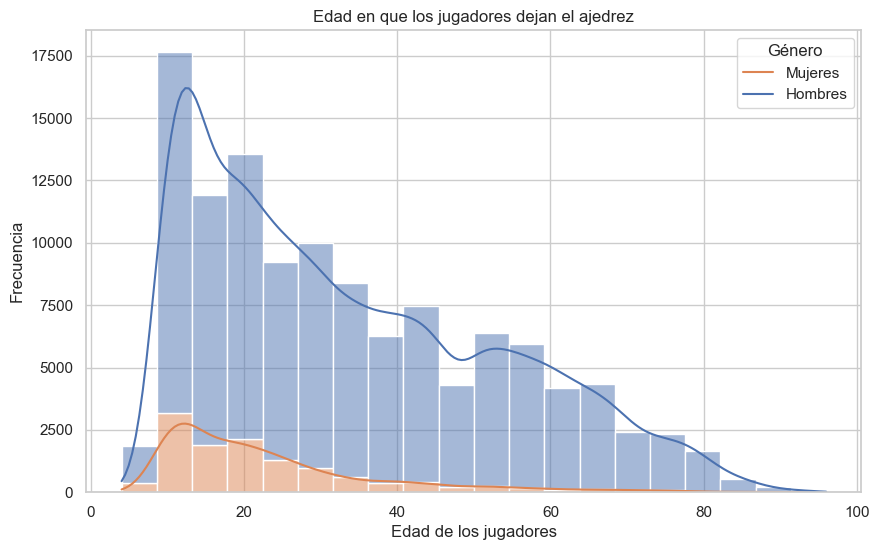

In [335]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear un histograma de la columna "category_age" distinguiendo entre hombres y mujeres
plt.figure(figsize=(10, 6))
sns.histplot(data=jugadores_inactivos_primer_ano, x='years_id', bins=20, kde=True, hue='gender', multiple='stack')

# Agregar etiquetas y título
plt.xlabel('Edad de los jugadores')
plt.ylabel('Frecuencia')
plt.title('Edad en que los jugadores dejan el ajedrez')

# Mostrar el gráfico
plt.legend(title='Género', labels=['Mujeres', 'Hombres'])
plt.show()


De los cuales, si distinguimos entre hombres y mujeres y calculamos su porcentaje y su totalidad:

In [261]:
sum_gender = jugadores_inactivos_primer_ano['gender'].value_counts()
porcentaje_gender = (sum_gender / sum_gender.sum()) * 100
print(porcentaje_gender, sum_gender)

gender
M    89.631583
F    10.368417
Name: count, dtype: float64 gender
M    106390
F     12307
Name: count, dtype: int64


Se observa que a los jugadores tienden a dejar el ajedrez en su juventud. Observamos un pico entre los 0 y los 20 años y después decrece hasta los 100. De todos modos, se debe tener en cuenta la cantidad de jugadores de cada edad, ya que probablemente no haya la misma cantidad de jugadores menores de 20 años que el resto. 
Calculemos la cantidad de jugadores que hay (activos e inactivos) para cada año y su edad.

In [15]:
# Calcular el total de valores para cada género
gender_counts = df_2020_clean['gender'].value_counts()

# Mostrar el resultado
print("Total de género M:", gender_counts['M'])
print("Total de género F:", gender_counts['F'])


Total de género M: 278216
Total de género F: 33054


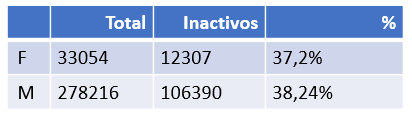

Hablamos de que dejan el ajedrez, durante esos 5 años, 106390 / 278216 hombres y 12307/33054 mujeres. Proporcionalmente, dejan el ajedrez el 37,2% de mujeres y el 38,24% de hombres. No es un porcentaje muy distinto.

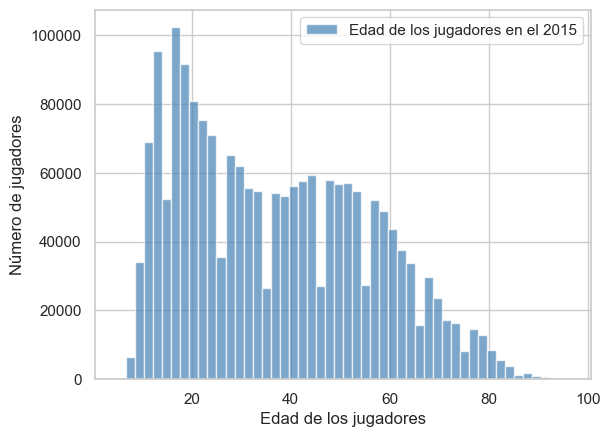

In [247]:
#Año 2015
df_2015_edad = df_evolution_clean[df_evolution_clean.year == 2015]

plt.hist(df_2015_edad.years_id, color = "steelblue", alpha = 0.7, bins = 50,label = "Edad de los jugadores en el 2015")
plt.xlabel("Edad de los jugadores")
plt.ylabel("Número de jugadores")
plt.legend();

In [250]:
df_2015_edad = df_evolution_clean[df_evolution_clean.year == 2015]
df_2016_edad = df_evolution_clean[df_evolution_clean.year == 2016]
df_2017_edad = df_evolution_clean[df_evolution_clean.year == 2017]
df_2018_edad = df_evolution_clean[df_evolution_clean.year == 2018]
df_2019_edad = df_evolution_clean[df_evolution_clean.year == 2019]
df_2020_edad = df_evolution_clean[df_evolution_clean.year == 2020]


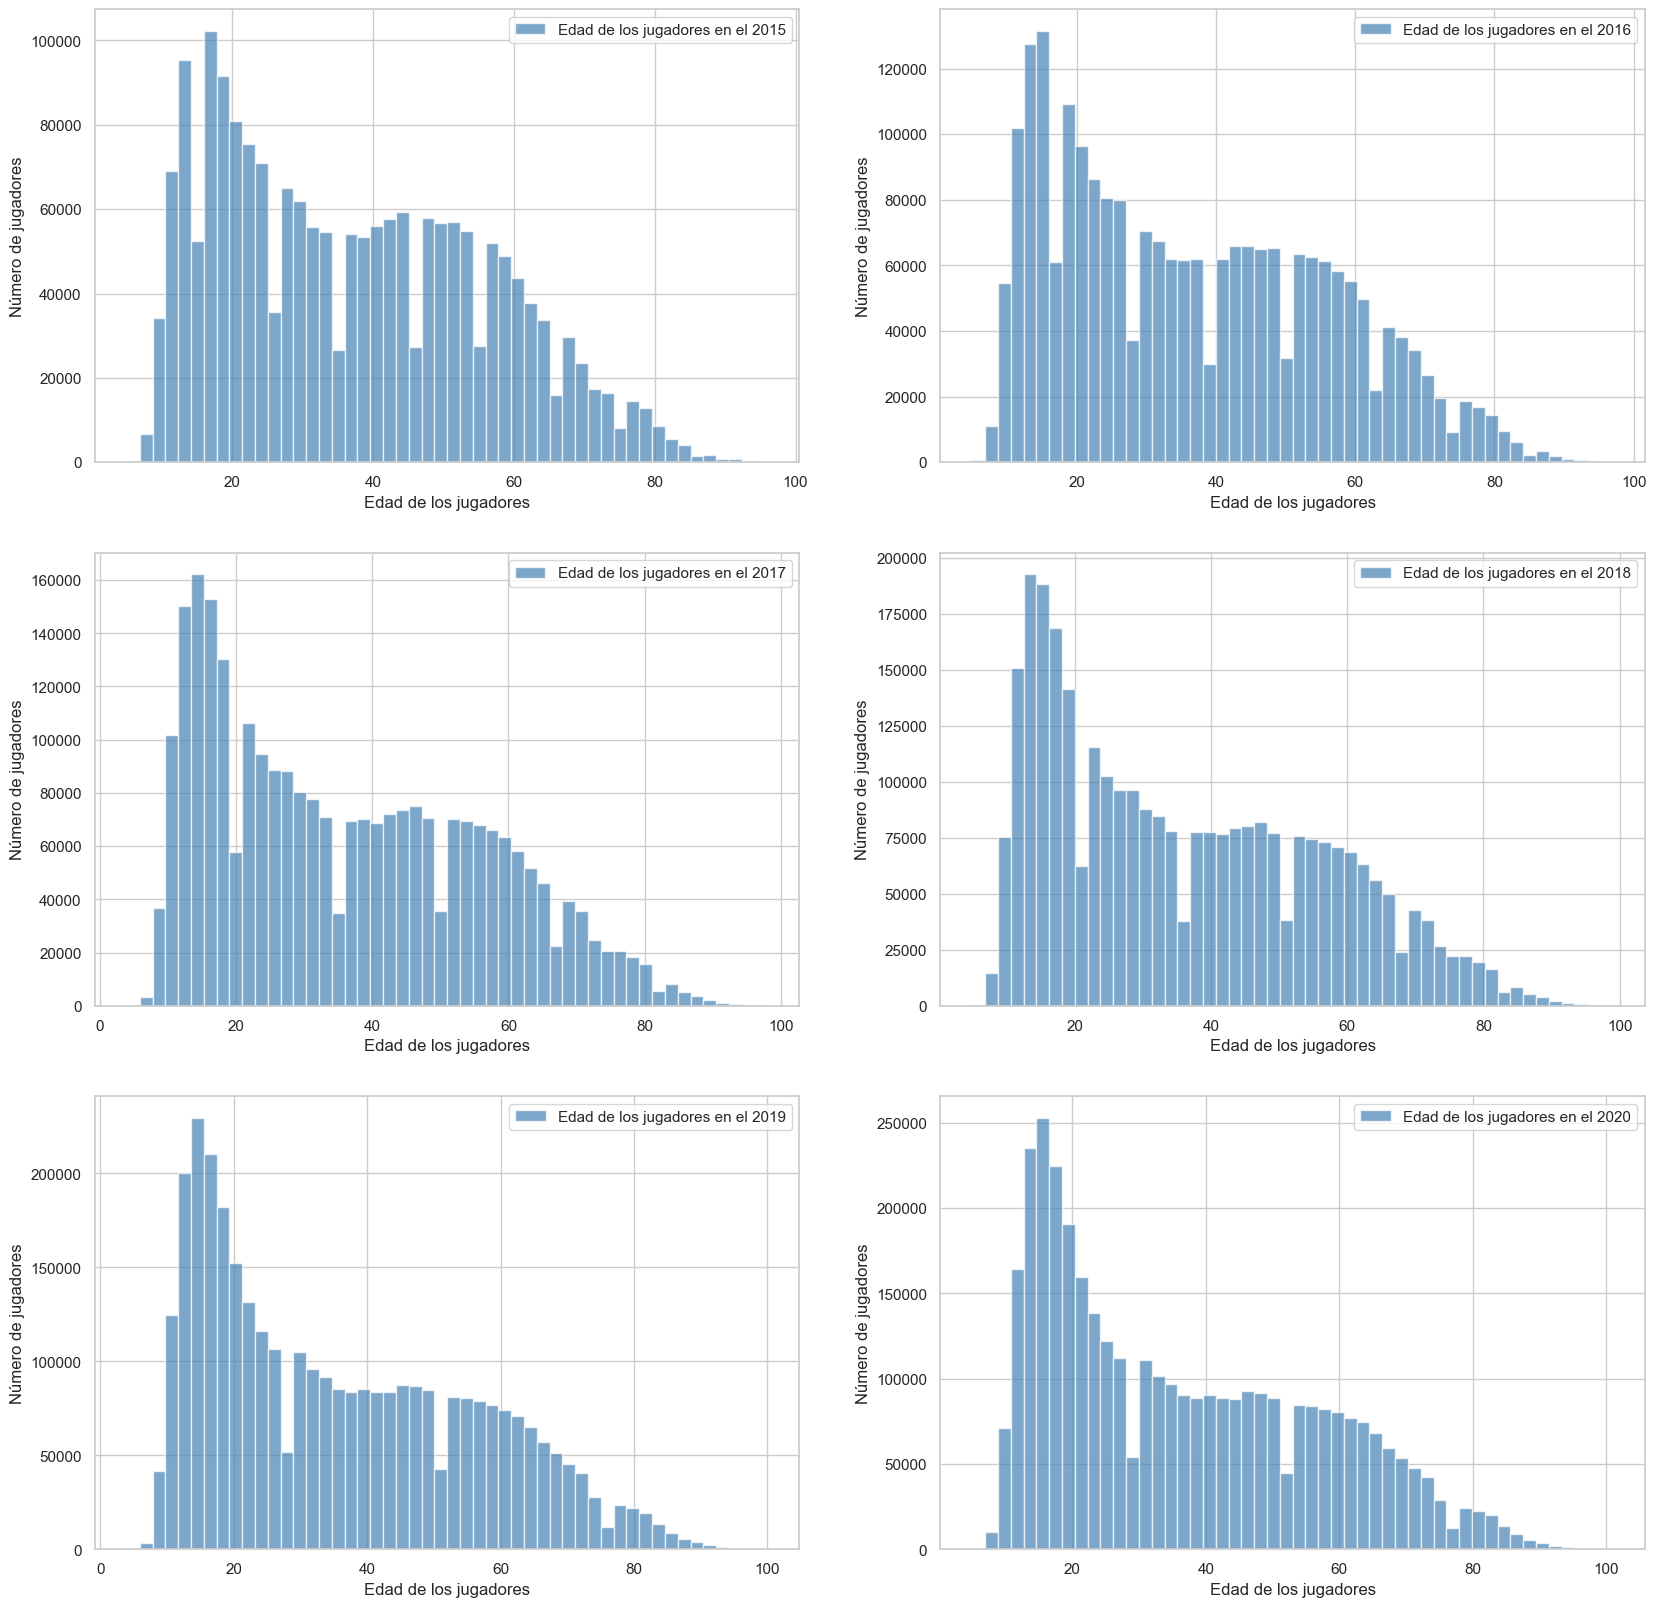

In [254]:
# Todas juntas

fig,axs = plt.subplots(3,2, figsize = (20,20))
axs = axs.flatten()

# Primera figura
primera = axs[0]
primera.hist(df_2015_edad.years_id, color = "steelblue", alpha = 0.7, bins = 50,label = "Edad de los jugadores en el 2015")
primera.set_xlabel("Edad de los jugadores")
primera.set_ylabel("Número de jugadores")
primera.legend();


# Segunda gráfica
segunda = axs[1]
segunda.hist(df_2016_edad.years_id, color = "steelblue", alpha = 0.7, bins = 50,label = "Edad de los jugadores en el 2016")
segunda.set_xlabel("Edad de los jugadores")
segunda.set_ylabel("Número de jugadores")
segunda.legend();


# Tercera gráfica
tercera = axs[2]
tercera.hist(df_2017_edad.years_id, color = "steelblue", alpha = 0.7, bins = 50,label = "Edad de los jugadores en el 2017")
tercera.set_xlabel("Edad de los jugadores")
tercera.set_ylabel("Número de jugadores")
tercera.legend();


# Cuarta gráfica
cuarta = axs[3]
cuarta.hist(df_2018_edad.years_id, color = "steelblue", alpha = 0.7, bins = 50,label = "Edad de los jugadores en el 2018")
cuarta.set_xlabel("Edad de los jugadores")
cuarta.set_ylabel("Número de jugadores")
cuarta.legend();


# Quinta gráfica
quinta = axs[4]
quinta.hist(df_2019_edad.years_id, color = "steelblue", alpha = 0.7, bins = 50,label = "Edad de los jugadores en el 2019")
quinta.set_xlabel("Edad de los jugadores")
quinta.set_ylabel("Número de jugadores")
quinta.legend();


# Cuarta gráfica
sexta = axs[5]
sexta.hist(df_2020_edad.years_id, color = "steelblue", alpha = 0.7, bins = 50,label = "Edad de los jugadores en el 2020")
sexta.set_xlabel("Edad de los jugadores")
sexta.set_ylabel("Número de jugadores")
sexta.legend();

Era previsible y era de esperar que la cantidad de jugadores, desde 2015 hasta 2020, fuera mayor en los menores de 20 años. De todos modos, no se ve una gran variación proporcional durante los años. Sí se observa que el número de jugadores año tras año crece, pero siempre se mantiene el número superior en aquellos jugadores cerca de los 20 años.

Volviendo a la pregunta principal, y una vez analizados los jugadores inactivos, veámos cómo evoluciona el Elo FIDE por género de los jugadores activos.

In [264]:
jugadores_activos = df_evolution_clean[~df_evolution_clean['fide_id'].isin(jugadores_inactivos['fide_id'])] #creamos el dataframe de jugadores activos
jugadores_activos

,federation,continent,fide_id,year,month,rating_standard,gender,title,years_id,category_age
1,AFG,Asia,11700017,2015,1,1816,M,No title,82,senior
2,AFG,Asia,11700025,2015,1,2000,M,FM,50,senior
6,AFG,Asia,11700076,2015,1,1998,M,No title,39,adult
7,AFG,Asia,11700084,2015,1,2013,M,FM,70,senior
11,AFG,Asia,11700190,2015,1,1814,M,No title,71,senior
...,...,...,...,...,...,...,...,...,...,...
17100743,DJI,África,32501021,2020,11,1970,M,No title,26,adult
17100745,DJI,África,8710651,2020,12,1629,M,No title,35,adult
17100746,DJI,África,32500033,2020,12,1570,M,No title,39,adult
17100748,DJI,África,32500173,2020,12,1542,M,No title,35,adult


In [336]:
jugadores_activos[jugadores_activos.fide_id == 11700017]

,federation,continent,fide_id,year,month,rating_standard,gender,title,years_id,category_age
1,AFG,Asia,11700017,2015,1,1816,M,No title,82,senior
28,AFG,Asia,11700017,2015,2,1816,M,No title,82,senior
57,AFG,Asia,11700017,2015,3,1816,M,No title,82,senior
86,AFG,Asia,11700017,2015,4,1816,M,No title,82,senior
117,AFG,Asia,11700017,2015,5,1816,M,No title,82,senior
...,...,...,...,...,...,...,...,...,...,...
3740,AFG,Asia,11700017,2020,8,1755,M,No title,87,senior
3823,AFG,Asia,11700017,2020,9,1755,M,No title,87,senior
3906,AFG,Asia,11700017,2020,10,1755,M,No title,87,senior
3989,AFG,Asia,11700017,2020,11,1755,M,No title,87,senior


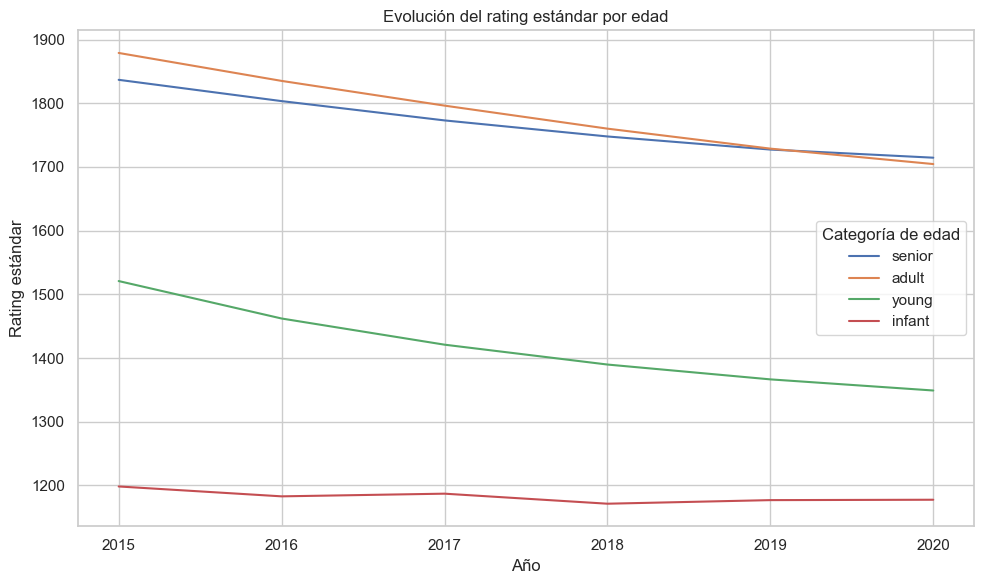

In [269]:
# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(data=jugadores_activos, x='year', y='rating_standard', hue='category_age', ci=None)

# Añadir título y etiquetas
plt.title('Evolución del rating estándar por edad')
plt.xlabel('Año')
plt.ylabel('Rating estándar')

# Mostrar el gráfico
plt.legend(title='Categoría de edad')
plt.tight_layout()
plt.show()

B. ¿Cómo evoluciona el Elo FIDE por género?

In [270]:
# Función para modificar la columna category_age
def modificar_categoria(row):
    if row['gender'] == 'M':
        return f"{row['category_age']} - M"
    else:
        return f"{row['category_age']} - F"

In [271]:
jugadores_activos_F_M = jugadores_activos.copy()
jugadores_activos_F_M['category_age'] = jugadores_activos_F_M.apply(modificar_categoria, axis=1)
jugadores_activos_F_M

,federation,continent,fide_id,year,month,rating_standard,gender,title,years_id,category_age
1,AFG,Asia,11700017,2015,1,1816,M,No title,82,senior - M
2,AFG,Asia,11700025,2015,1,2000,M,FM,50,senior - M
6,AFG,Asia,11700076,2015,1,1998,M,No title,39,adult - M
7,AFG,Asia,11700084,2015,1,2013,M,FM,70,senior - M
11,AFG,Asia,11700190,2015,1,1814,M,No title,71,senior - M
...,...,...,...,...,...,...,...,...,...,...
17100743,DJI,África,32501021,2020,11,1970,M,No title,26,adult - M
17100745,DJI,África,8710651,2020,12,1629,M,No title,35,adult - M
17100746,DJI,África,32500033,2020,12,1570,M,No title,39,adult - M
17100748,DJI,África,32500173,2020,12,1542,M,No title,35,adult - M


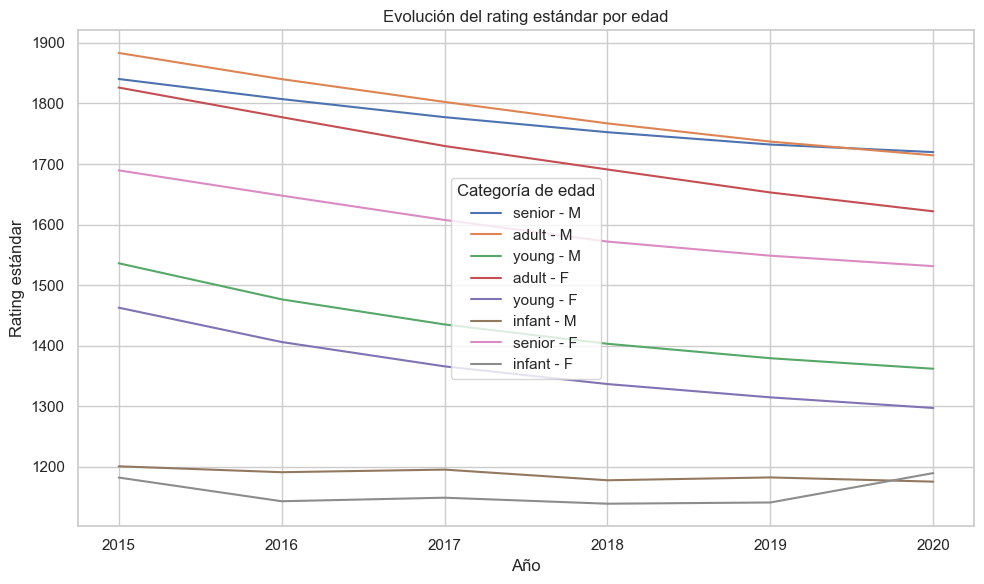

In [273]:
# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(data=jugadores_activos_F_M, x='year', y='rating_standard', hue='category_age', ci=None)

# Añadir título y etiquetas
plt.title('Evolución del rating estándar por edad')
plt.xlabel('Año')
plt.ylabel('Rating estándar')

# Mostrar el gráfico
plt.legend(title='Categoría de edad')
plt.tight_layout()
plt.show()


Podríamos decir que la curva de evolución son muy parecidas. Si bien es verdad que las mujeres muestran un Elo inferior a los hombres, la curva desciende por igual. 

C. ¿Aumenta el número de jugadores? ¿De qué edades aproximadamente? ¿Aumenta más el género masculino que el femenino, o por igual?

Para determinar si el número de jugadores aumenta año tras año, calculamos el recuento de jugadores para cada año y luego trazamos un gráfico de línea para visualizar la tendencia.

In [277]:
# Calcular el recuento de jugadores para cada año
jugadores_por_ano = jugadores_activos.groupby('year').size()

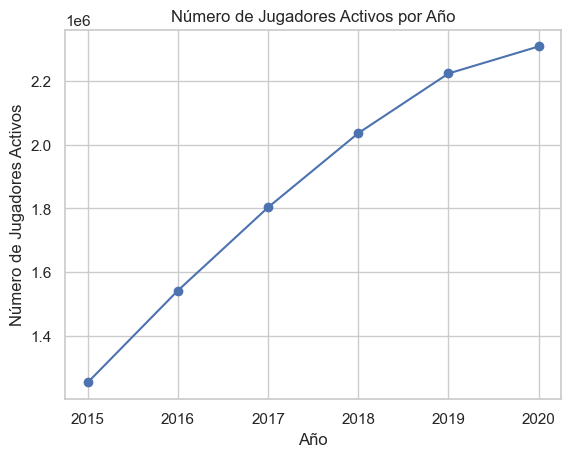

In [278]:
# Crear un gráfico de línea
plt.plot(jugadores_por_ano.index, jugadores_por_ano.values, marker='o')
plt.xlabel('Año')
plt.ylabel('Número de Jugadores Activos')
plt.title('Número de Jugadores Activos por Año')
plt.show()


Para determinar qué edades aumentan más, calculamos el recuento de jugadores por grupo de edad para cada año y luego trazamos un gráfico de barras apiladas para comparar la distribución de edades a lo largo de los años.

In [342]:
jugadores_por_edad

category_age,adult,infant,senior,young
year,,,,
2015,608773,1538,357273,286483
2016,710223,2777,425534,403913
2017,810064,3431,491006,498862
2018,910128,3526,552513,569943
2019,1005176,3064,605400,609636
2020,1082003,523,650934,574634


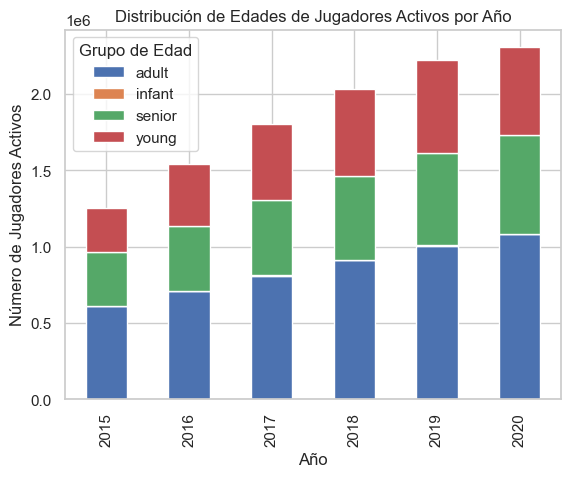

In [344]:
jugadores_por_edad = jugadores_activos.groupby(['year', 'category_age']).size().unstack(fill_value=0)

jugadores_por_edad.plot(kind='bar', stacked=True)
plt.xlabel('Año')
plt.ylabel('Número de Jugadores Activos')
plt.title('Distribución de Edades de Jugadores Activos por Año')
plt.legend(title='Grupo de Edad')
plt.show()


Para determinar si aumenta más el género masculino que el femenino o por igual, calculamos el recuento de jugadores por género para cada año y luego trazamos un gráfico de barras para comparar la distribución de género a lo largo de los años.

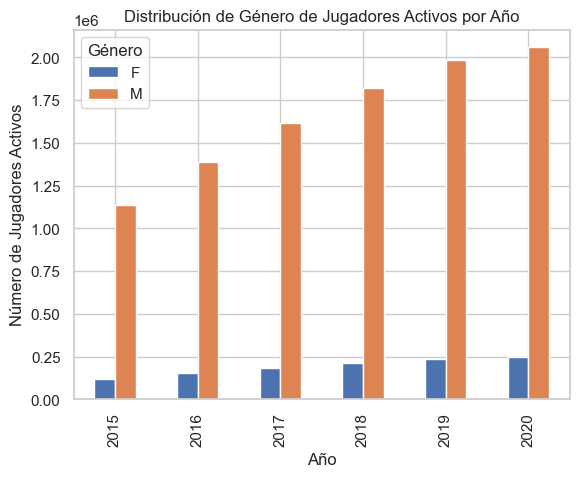

In [280]:
# Calcular el recuento de jugadores por género para cada año
jugadores_por_genero = jugadores_activos.groupby(['year', 'gender']).size().unstack(fill_value=0)

# Crear un gráfico de barras
jugadores_por_genero.plot(kind='bar')
plt.xlabel('Año')
plt.ylabel('Número de Jugadores Activos')
plt.title('Distribución de Género de Jugadores Activos por Año')
plt.legend(title='Género')
plt.show()


D. ¿Qué relación existe entre el aumento de jugadores de un continente a otro? ¿Qué países son los que tienen un aumento mayor? ¿Qué países aumenta más el número de mujeres jugadoras?

In [308]:
# Calcular el aumento de jugadores por continente de un año a otro
aumento_jugadores_por_continente = jugadores_activos.groupby(['continent', 'year'])['fide_id'].count().unstack().diff(axis=1)

# Determinar los países con el mayor aumento
paises_mayor_aumento = aumento_jugadores_por_continente.sum(axis=1).sort_values(ascending=False).head(10)

# Analizar el aumento de mujeres jugadoras por país
aumento_mujeres_por_pais = jugadores_activos[jugadores_activos['gender'] == 'F'].groupby(['federation', 'year'])['fide_id'].count().unstack().diff(axis=1)
paises_mayor_aumento_mujeres = aumento_mujeres_por_pais.sum(axis=1).sort_values(ascending=False).head(10)


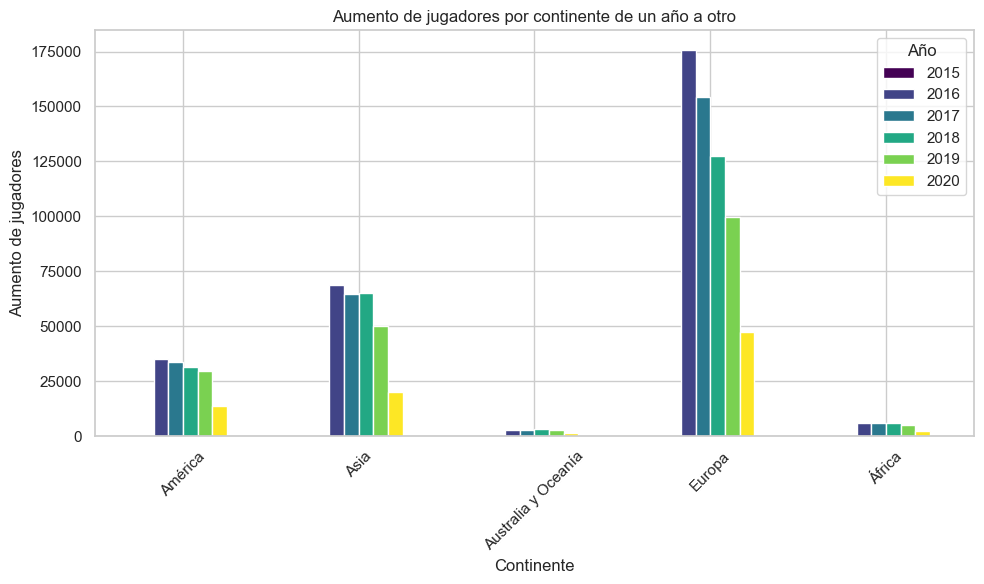

In [309]:
import matplotlib.pyplot as plt

# Calcular el aumento de jugadores por continente de un año a otro
aumento_jugadores_por_continente = jugadores_activos.groupby(['continent', 'year'])['fide_id'].count().unstack().diff(axis=1)

# Graficar
fig, ax = plt.subplots(figsize=(10, 6))
aumento_jugadores_por_continente.plot(kind='bar', ax=ax, colormap='viridis')
ax.set_title('Aumento de jugadores por continente de un año a otro')
ax.set_xlabel('Continente')
ax.set_ylabel('Aumento de jugadores')
plt.xticks(rotation=45)
plt.legend(title='Año')
plt.tight_layout()
plt.show()

Si bien es verdad que año tras año aumenta el número de jugadores, observamos que el aumento de jugadores en 2015 fue increíblemente alto en comparación con el número de jugadores que se federaron en 2020. 
se debiera realizar un estudio social para saber qué posibles causas estaban llevan por aquél entonces a que hubiera menos crecimiento en jugadores federados.

In [313]:
aumento_jugadores_por_continente = jugadores_activos.groupby(['continent', 'year'])['fide_id'].count().unstack().diff(axis=1)
aumento_jugadores_por_continente

year,2015,2016,2017,2018,2019,2020
continent,,,,,,
América,NaN,35249,33544,31263,29524,13608
Asia,NaN,68620,64636,65302,50041,20123
Australia y Oceanía,NaN,2659,2570,3028,2716,1185
Europa,NaN,175810,154343,127408,99671,47478
África,NaN,6042,5823,5746,5214,2424


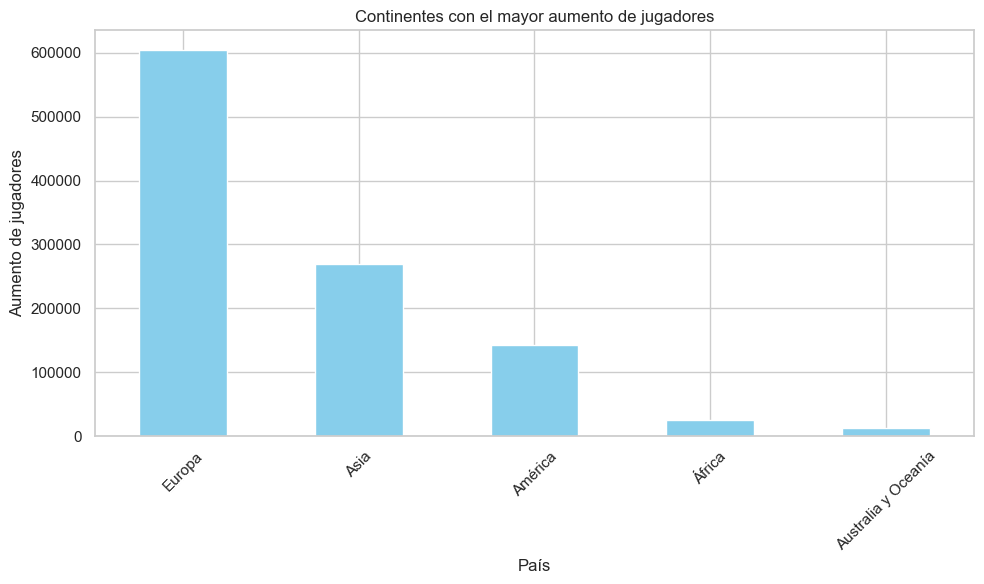

In [317]:
# Graficar
fig, ax = plt.subplots(figsize=(10, 6))
paises_mayor_aumento.plot(kind='bar', ax=ax, color='skyblue')
ax.set_title('Continentes con el mayor aumento de jugadores')
ax.set_xlabel('País')
ax.set_ylabel('Aumento de jugadores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

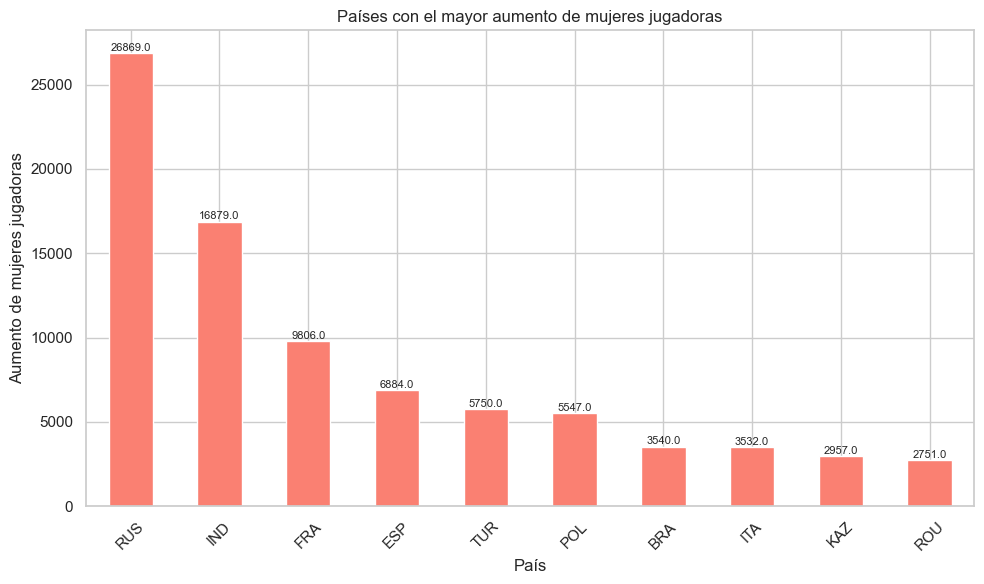

In [316]:
# Graficar
fig, ax = plt.subplots(figsize=(10, 6))
paises_mayor_aumento_mujeres.plot(kind='bar', ax=ax, color='salmon')
ax.set_title('Países con el mayor aumento de mujeres jugadoras')
ax.set_xlabel('País')
ax.set_ylabel('Aumento de mujeres jugadoras')
plt.xticks(rotation=45)

# Agregar valores en las columnas
for i, v in enumerate(paises_mayor_aumento_mujeres):
    ax.text(i, v + 10, str(v), ha='center', va='bottom', rotation=0, fontsize=8)

plt.tight_layout()
plt.show()


Anteriormente, hemos visto que Europa era el país que más aumentaba en jugadores, pero aquí vemos que Rusia es el país con más ventaja con respecto a los demás.

E. ¿Aumenta el número de títulos por año? ¿Aumenta en mujeres?

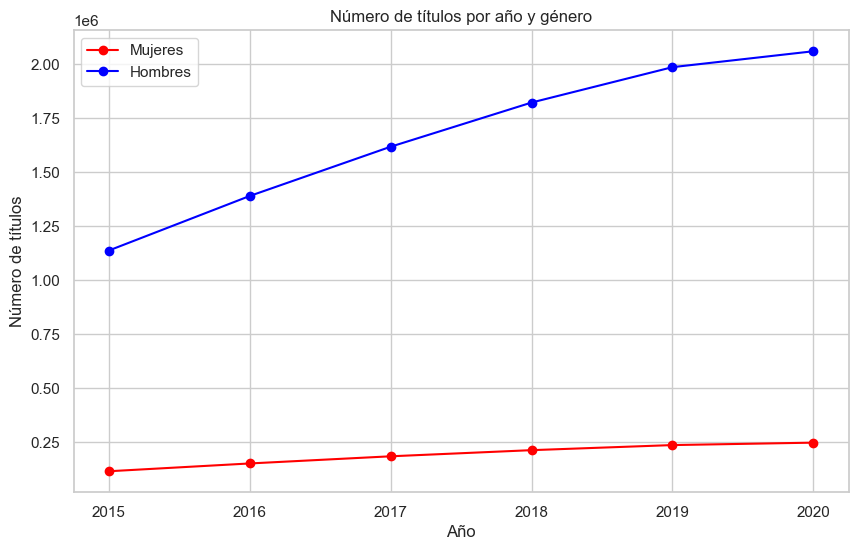

In [294]:
# Agrupar por año y género y calcular el número total de títulos
titulos_por_anio_genero = jugadores_activos.groupby(['year', 'gender'])['title'].count().reset_index()

# Filtrar por género femenino
titulos_mujeres = titulos_por_anio_genero[titulos_por_anio_genero['gender'] == 'F']

# Graficar el número de títulos por año para ambos géneros
plt.figure(figsize=(10, 6))
plt.plot(titulos_mujeres['year'], titulos_mujeres['title'], marker='o', label='Mujeres', color='red')
plt.plot(titulos_por_anio_genero[titulos_por_anio_genero['gender'] == 'M']['year'], titulos_por_anio_genero[titulos_por_anio_genero['gender'] == 'M']['title'], marker='o', label='Hombres', color='blue')
plt.xlabel('Año')
plt.ylabel('Número de títulos')
plt.title('Número de títulos por año y género')
plt.legend()
plt.grid(True)
plt.show()

